## Requisitos básicos para funcionar
<br>

#### Instalar o MetaTrader5
#### Ter instalado a biblioteca do MetaTrader5
#### Ter uma conta em uma instituição de investimentos para acessar o mercado BR.

### Verificando se estou no ambiente correto
<br>

##### Criei esse ambiente separado para caso desse algum problema com as novas bibliotecas instaladas

In [4]:
import sys
print(sys.executable)

C:\Users\Bill_\anaconda3\envs\metaTrader\python.exe


### Verificando se o MetaTrader está funcionando e conectado
<br>

##### Do contrário abrir o terminal64.exe (executador do MetaTrader) antes da IDE Python

In [5]:
import MetaTrader5 as mt5


# Exibir a versão do MetaTrader5 instalada
print("MetaTrader5 package version:", mt5.__version__)

# Inicializar a conexão com MetaTrader 5
if not mt5.initialize():
    print("Failed to initialize. Error code =", mt5.last_error())
else:
    print("Connected to MetaTrader 5")

MetaTrader5 package version: 5.0.4424
Connected to MetaTrader 5


### Fazendo o login no servidor XP Investimentos
<br>

##### Necessário para ter acesso aos dados brasileiros (pode ser qualquer empresa do tipo)

In [6]:
# Para ler corretamente, deixe o arquivo txt na pasta do ipynb e em cada linha
# respectivamente colocar login, password e na terceira linha o server, esses dados
# são passados pela corretora após "assinar" o metatrater no site da corretora, o metatrader5
# é gratis
with open("credentials.txt", 'r') as file:
    login, password, server = file.read().splitlines()

# Conectar ao MetaTrader 5
# o txt abre tudo como string, transformar o login em int antes de usar!!
if not mt5.initialize(login=int(login), password=password, server=server):
    print("Falha ao conectar:", mt5.last_error()) # <------ Se o login falhar 
else:
    print("Conexão bem-sucedida ao MetaTrader 5") # <---- Sucesso

# Posteriormente verificar se é conveniente fechar a conexão
# Fechar a conexão ao final
# mt5.shutdown()

Conexão bem-sucedida ao MetaTrader 5


### Obtendo dados das empresas/organizações desejadas

In [7]:
from datetime import datetime, timedelta
import investpy

# Obter a lista de todas as ações da Bovespa (B3)
#acoes = investpy.stocks.get_stocks_list(country='brazil') <-- Mais de 20kk de linhas


# mt5.TIMEFRAME_M1 (1 minuto)
# mt5.TIMEFRAME_H1 (1 hora)
# mt5.TIMEFRAME_D1 (1 dia)
# mt5.TIMEFRAME_W1 (1 semana)

# Definir o intervalo de datas
data_final = datetime.now()
data_inicial = data_final - timedelta(days=1460) 

# Lista de ações
acoes = ["PETR4", "VALE3", "ITUB4", "BBAS3", "B3SA3", "ABEV3", "MGLU3", "BRFS3", "ELET3", "UGPA3", "CIEL3"]

dados = {}
for acao in acoes:
    rates = mt5.copy_rates_range(acao, mt5.TIMEFRAME_M1, data_inicial, data_final)
    dados[acao] = rates

# Fechar a conexão após obter os dados
mt5.shutdown()

dados

{'PETR4': array([(1601892660,  6.43,  6.43,  6.41,  6.42, 937, 1, 1455300),
        (1601892720,  6.42,  6.42,  6.41,  6.42, 211, 1,  263100),
        (1601892780,  6.42,  6.44,  6.41,  6.43, 404, 1,  414900), ...,
        (1727805420, 37.1 , 37.1 , 37.1 , 37.1 ,   1, 2,     100),
        (1727805480, 37.08, 37.08, 37.07, 37.07,   2, 2,    1000),
        (1727805540, 37.1 , 37.11, 37.1 , 37.11,   6, 4,    8800)],
       dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')]),
 'VALE3': array([(1601892480, 40.11, 40.15, 40.01, 40.13, 477, 1, 425000),
        (1601892540, 40.13, 40.16, 40.05, 40.14, 227, 1,  77000),
        (1601892600, 40.14, 40.33, 40.09, 40.19, 372, 1, 290700), ...,
        (1727805360, 63.9 , 63.9 , 63.89, 63.89,   4, 1,   2400),
        (1727805420, 63.91, 63.95, 63.91, 63.95,   7, 1,   5000),
        (1727805540, 63.9 , 63.95, 63.9 , 63.95,   8, 1,   2900)],
    

### Sumário das Variáveis

1. **time**
   - **Descrição:** Timestamp do início do período representado pela linha.
   - **Formato:** `datetime` (convertido a partir de um valor UNIX timestamp).
   - **Detalhe:** Representa o início do período correspondente à linha (ex.: se o timeframe é diário, `time` marca o início do dia).

2. **open**
   - **Descrição:** Preço de abertura do ativo no início do período.
   - **Formato:** `float`.
   - **Detalhe:** Reflete o primeiro preço negociado no período.

3. **high**
   - **Descrição:** Preço mais alto alcançado pelo ativo durante o período.
   - **Formato:** `float`.
   - **Detalhe:** Indica o preço máximo que o ativo atingiu no período.

4. **low**
   - **Descrição:** Preço mais baixo alcançado pelo ativo durante o período.
   - **Formato:** `float`.
   - **Detalhe:** Indica o preço mínimo que o ativo atingiu no período.

5. **close**
   - **Descrição:** Preço de fechamento do ativo ao final do período.
   - **Formato:** `float`.
   - **Detalhe:** Reflete o último preço negociado no período.

6. **tick_volume**
   - **Descrição:** Volume de ticks (ou número de transações) durante o período.
   - **Formato:** `int`.
   - **Detalhe:** Indica o número total de negociações que ocorreram durante o período.

7. **spread**
   - **Descrição:** Diferença entre o preço de compra (ask) e o preço de venda (bid) no final do período.
   - **Formato:** `int`.
   - **Detalhe:** O spread pode indicar a liquidez do ativo; spreads menores geralmente indicam alta liquidez.

8. **real_volume**
   - **Descrição:** Volume real negociado durante o período, geralmente em unidades da moeda ou quantidade de ações.
   - **Formato:** `int`.
   - **Detalhe:** Este volume real é diferente do `tick_volume`, que conta o número de transações, pois reflete a quantidade total de unidades negociadas.

### Bibliotecas para Dados e ML

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
###############################################################################
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
###############################################################################

from statsmodels.tsa.stattools import ccf
from tqdm import tqdm # Usado para mostrar as barras de carregamentos 

from pycaret.classification import *





### Convertendo os dados em um DataFrame
<br>


##### Por mais que os dados estejam unidos em um único DataFrame, vou usar valores proporcionais, assim é possível extrair a vantagem de ter uma quantidade massiva de dados e ao mesmo tempo fazer uma comparação direta entre todas ações da Bovespa.

In [9]:
# Lista para armazenar DataFrames
dfs = []

for acao, data in dados.items():
    # Converter o array para DataFrame
    df = pd.DataFrame(data)
    
    # Adicionar a coluna 'acao'
    df['acao'] = acao
    
    # Adicionar ao DataFrame final
    dfs.append(df)

# Concatenar todos os DataFrames em um único DataFrame
df_acoes = pd.concat(dfs, ignore_index=True)

df_acoes

time   open   high    low  close  tick_volume  spread  \
0        1.601893e+09   6.43   6.43   6.41   6.42        937.0     1.0   
1        1.601893e+09   6.42   6.42   6.41   6.42        211.0     1.0   
2        1.601893e+09   6.42   6.44   6.41   6.43        404.0     1.0   
3        1.601893e+09   6.43   6.43   6.42   6.43        225.0     1.0   
4        1.601893e+09   6.43   6.43   6.42   6.43        207.0     1.0   
...               ...    ...    ...    ...    ...          ...     ...   
4266473  1.727804e+09  21.45  21.51  21.45  21.51          6.0     6.0   
4266474  1.727804e+09  21.54  21.54  21.54  21.54          1.0     9.0   
4266475  1.727805e+09  21.54  21.54  21.54  21.54          1.0     9.0   
4266476  1.727805e+09  21.54  21.54  21.54  21.54          2.0     4.0   
4266477  1.727805e+09  21.51  21.51  21.51  21.51          1.0    15.0   

         real_volume   acao  
0          1455300.0  PETR4  
1           263100.0  PETR4  
2           414900.0  PETR4  
3           279500.0  PETR4  
4           341800.0  PETR4  
...              ...    ...  
4266473       2300.0  UGPA3  
4266474        300.0  UGPA3  
4266475        100.0  UGPA3  
4266476        200.0  UGPA3  
4266477        300.0  UGPA3  

[4266478 rows x 9 columns]

### Estratégia
<br>

##### Uma estratégia comum em se analisar ações é verificar como ela se comporta com o decorrer do tempo, identificar os momentos de baixa para compra e os momentos de alta para venda e o intuito vai ser exatamente esse, os dados serão tratados e será feito colunas que possam auxiliar na análise dessas oportunidades.

### DataFrame de modelagem
<br>

##### Os dados puxados da bolsa já estão arrumados, porém é necessário fazer vários ajustes e criação de features como descrito anteriormente. A coluna spread que é a diferença de valores de abertura e fechamento não é um parametro tão bom pois a faixa de tempo de minuto a minuto faz com que o spread tenha um valor irrelevante.
<br>

##### A coluna tick_volume é um valor aproximado do volume, porém como o volume real está disponível essa coluna não será necessária também.
<br>

##### As colunas a serem criadas vão usar os valores de fechamento(close) como base do valor daquele minuto e a coluna time como referência do tempo, os diferentes valores ao longo do tempo vai ser essêncial para entender o comportamento de cada ação.

In [94]:
# Criar o DataFrame df_modelar como cópia de df_acoes
df_modelar = df_acoes.copy()

# Converter a coluna 'time' para o formato datetime
df_modelar['time'] = pd.to_datetime(df_modelar['time'], unit='s')

# Ordenar o DataFrame por 'acao' e 'time'
df_modelar = df_modelar.sort_values(by=['acao', 'time'])

# Criar a coluna 'spread' como a diferença entre 'close' e 'open'
df_modelar['spread'] = df_modelar['close'] - df_modelar['open']

# Remover as colunas 'high', 'low' e 'tick_volume'
df_modelar = df_modelar.drop(columns=['high', 'low', 'tick_volume'])

# Resetar o índice e deixá-lo em ordem crescente
df_modelar = df_modelar.reset_index(drop=True)

# Visualizar as primeiras linhas do DataFrame resultante
df_modelar

#df_modelar.to_csv('df_modelar.csv', index=False)

## SE Já tem o arquivo comece aqui!

In [ ]:
# Carregar o arquivo CSV
'''df_modelar_carregado = pd.read_csv('df_modelar.csv')'''

### Identificação das quedas
<br>

##### Confesso que comecei olhando um período menor de tempo para identificar as quedas, com 3h, 1d e 2w, porém ao analisar o gráfico ficou meio ruim, algumas quedas não foram capturadas adequadamente e qualquer queda minima já estava sendo classificada, após aumentar a janela de tempo o gráfico melhorou muito e as verdadeiras quedas foram identificadas. 
<br>

##### Futuramente isso pode ser alterado, procurando um ponto ótimo com foco no valor ganho.



##### Observação: A função criada foi para caso queira incluir mais colunas de tempos diferentes e analisar se os tempos diferentes capturam diferentes momentos de quedas ao analisar o gráfico. Acabei usando apenas de 2 dias que já me foi o suficiênte por enquanto.

In [11]:
# Função para calcular os quantis e identificar se está entre os 10% menores no 'close'
def identificar_queda(df, periodo_minutos):
    # Criar uma janela móvel para olhar 2880 minutos para trás com min_periods=2880
    rolling_window = df['close'].rolling(window=periodo_minutos, min_periods=periodo_minutos)
    
    # Calcular o percentil 10 da janela
    quantil_10 = rolling_window.quantile(0.10)
    
    # Comparar se o valor atual de 'close' está entre os 10% menores
    # Substituir valores NaN por False
    return (df['close'] <= quantil_10).fillna(False)

# Aplicar a função para cada grupo de ações usando 'groupby'
df_modelar['drawdown_2d'] = df_modelar.groupby('acao', group_keys=False).apply(
    lambda x: identificar_queda(x, periodo_minutos=2880)
)

# Visualizar as primeiras linhas do DataFrame com a nova coluna
df_modelar

time   open  close  spread  real_volume   acao  \
0       2020-10-05 10:08:00  10.84  10.87    0.03     169600.0  ABEV3   
1       2020-10-05 10:09:00  10.86  10.93    0.07     166600.0  ABEV3   
2       2020-10-05 10:10:00  10.92  10.87   -0.05     107100.0  ABEV3   
3       2020-10-05 10:11:00  10.88  10.85   -0.03     140200.0  ABEV3   
4       2020-10-05 10:12:00  10.86  10.87    0.01      41200.0  ABEV3   
...                     ...    ...    ...     ...          ...    ...   
4266473 2024-10-01 17:54:00  63.88  63.84   -0.04       1500.0  VALE3   
4266474 2024-10-01 17:55:00  63.89  63.88   -0.01       1600.0  VALE3   
4266475 2024-10-01 17:56:00  63.90  63.89   -0.01       2400.0  VALE3   
4266476 2024-10-01 17:57:00  63.91  63.95    0.04       5000.0  VALE3   
4266477 2024-10-01 17:59:00  63.90  63.95    0.05       2900.0  VALE3   

         drawdown_2d  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
4266473        False  
4266474        False  
4266475        False  
4266476        False  
4266477        False  

[4266478 rows x 7 columns]

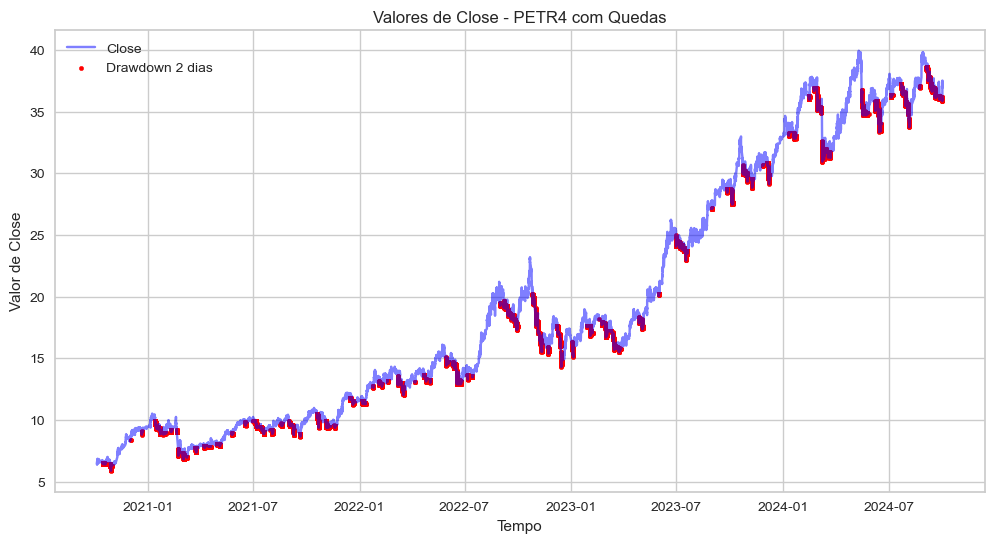

In [12]:
# Filtrar os dados para a ação PETR4
df_petrobras = df_modelar[df_modelar['acao'] == 'PETR4']

# Criar a figura e o eixo
plt.figure(figsize=(12, 6))

# Plotar os valores de 'close' ao longo do tempo
plt.plot(df_petrobras['time'], df_petrobras['close'], label='Close', color='blue', alpha=0.5)

# Plotar os pontos onde 'drawdown_1d' é True
plt.scatter(df_petrobras[df_petrobras['drawdown_2d'] == True]['time'],  # Eixo X
            df_petrobras[df_petrobras['drawdown_2d'] == True]['close'], # Eixo Y
            color='red', label='Drawdown 2 dias', s=10)

# Adicionar título e rótulos
plt.title('Valores de Close - PETR4 com Quedas')
plt.xlabel('Tempo')
plt.ylabel('Valor de Close')

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

##### Apesar de identificar bem as quedas, por vezes as quedas são constantes e seria melhor esperar a continuar a cair para pegar um valor ainda menor.

In [13]:
pct_quantidade_quedas = df_modelar['drawdown_2d'].mean() * 100
print(f"Porcentagem de quedas identificadas: {pct_quantidade_quedas:.2f}%")

Porcentagem de quedas identificadas: 20.44%


##### O código abaixo tem a mesma função que o anterior, porém dessa vez foi incluido uma lógica para verificar se o valor continua caindo. A variável mudança verifica se o valor atual é diferente do anterior, se ambos forem quedas eles vão estar como True e True e a variável não vai identificar que são diferentes, assim salvando a mudança como False, então sempre que tiver uma quebra na queda a mudança vai salvar como True e saberemos que as quedas consecutivas acabaram.

In [14]:
# Função para calcular os quantis e identificar se está entre os 10% menores no 'close' por grupo (ação)
def identificar_queda(df, periodo_minutos):
    # Criar uma janela móvel para olhar 2880 minutos para trás com min_periods=2880
    rolling_window = df['close'].rolling(window=periodo_minutos, min_periods=periodo_minutos)
    
    # Calcular o percentil 10 da janela
    quantil_10 = rolling_window.quantile(0.10)
    
    # Comparar se o valor atual de 'close' está entre os 10% menores
    pct_10_menores = (df['close'] <= quantil_10).fillna(False)
    
    # Identificar mudança de valor (True para False e vice-versa)
    mudança = pct_10_menores != pct_10_menores.shift(1)
    
    # Identificar a posição dos últimos True em cada sequência
    última_ocorrencia = mudança.shift(-1) & pct_10_menores
    
    # Retornar a série ajustada para manter apenas o último True de cada sequência
    return última_ocorrencia

# Aplicar a função para cada grupo de ações
df_modelar['drawdown_2d'] = df_modelar.groupby('acao', group_keys=False).apply(
    lambda x: identificar_queda(x, periodo_minutos=2880)
)

# Calcular a porcentagem de quedas identificadas
pct_quantidade_quedas = df_modelar['drawdown_2d'].mean() * 100
print(f"Porcentagem de quedas identificadas: {pct_quantidade_quedas:.2f}%")

Porcentagem de quedas identificadas: 0.56%


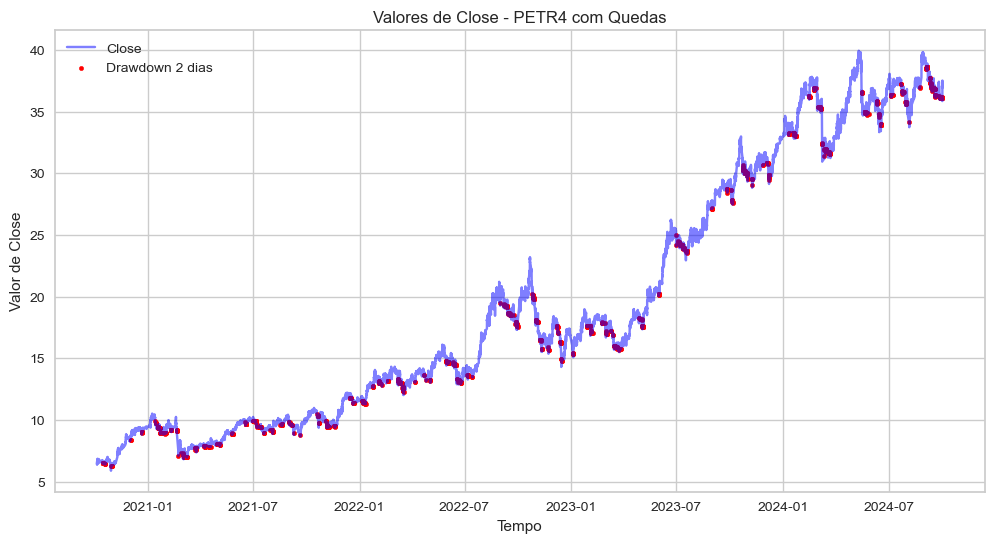

In [15]:
# Filtrar os dados para a ação PETR4
df_petrobras = df_modelar[df_modelar['acao'] == 'PETR4']

# Criar a figura e o eixo
plt.figure(figsize=(12, 6))

# Plotar os valores de 'close' ao longo do tempo
plt.plot(df_petrobras['time'], df_petrobras['close'], label='Close', color='blue', alpha=0.5)

# Plotar os pontos onde 'drawdown_1d' é True
plt.scatter(df_petrobras[df_petrobras['drawdown_2d'] == True]['time'],  # Eixo X
            df_petrobras[df_petrobras['drawdown_2d'] == True]['close'], # Eixo Y
            color='red', label='Drawdown 2 dias', s=10)

# Adicionar título e rótulos
plt.title('Valores de Close - PETR4 com Quedas')
plt.xlabel('Tempo')
plt.ylabel('Valor de Close')

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Identificação dos picos
<br>

##### Os picos vão ser identificados da mesma forma que as quedas, porém pegando os valores de percentis altos, a estratégia para verificar se o aumento continua se mantém, para que não pegue uma sequencia de valores que estão em ascensão.

In [16]:
# Função para calcular os quantis e identificar se está entre os 10% maiores no 'close' por grupo (ação)
def identificar_overbought(df, periodo_minutos):
    # Criar uma janela móvel para olhar 2880 minutos para trás com min_periods=2880
    rolling_window = df['close'].rolling(window=periodo_minutos, min_periods=periodo_minutos)
    
    # Calcular o percentil 90 da janela
    quantil_90 = rolling_window.quantile(0.90)
    
    # Comparar se o valor atual de 'close' está entre os 10% maiores
    pct_10_maiores = (df['close'] >= quantil_90).fillna(False)
    
    # Identificar mudança de valor (True para False e vice-versa)
    mudança = pct_10_maiores != pct_10_maiores.shift(1)
    
    # Identificar a posição dos últimos True em cada sequência
    última_ocorrencia = mudança.shift(-1) & pct_10_maiores
    
    # Retornar a série ajustada para manter apenas o último True de cada sequência
    return última_ocorrencia

# Aplicar a função para cada grupo de ações
df_modelar['overbought_2d'] = df_modelar.groupby('acao', group_keys=False).apply(
    lambda x: identificar_overbought(x, periodo_minutos=2880)
)

# Calcular a porcentagem de valores overbought identificados
pct_quantidade_overbought = df_modelar['overbought_2d'].mean() * 100
print(f"Porcentagem de valores overbought identificados: {pct_quantidade_overbought:.2f}%")

Porcentagem de valores overbought identificados: 0.58%


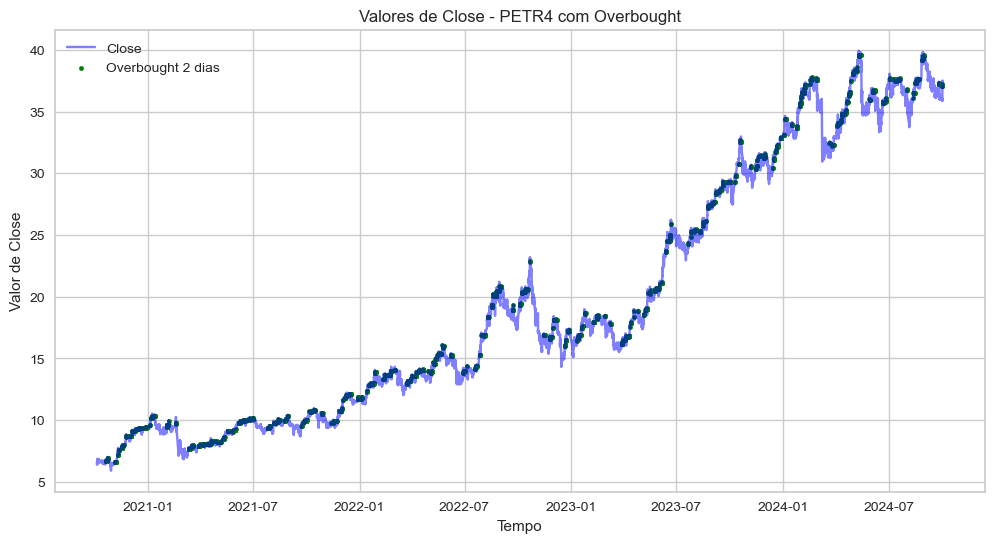

In [17]:
# Filtrar os dados para a ação PETR4
df_petrobras = df_modelar[df_modelar['acao'] == 'PETR4']

# Criar a figura e o eixo
plt.figure(figsize=(12, 6))

# Plotar os valores de 'close' ao longo do tempo
plt.plot(df_petrobras['time'], df_petrobras['close'], label='Close', color='blue', alpha=0.5)

# Plotar os pontos onde 'overbought_2d' é True
plt.scatter(df_petrobras[df_petrobras['overbought_2d'] == True]['time'],  # Eixo X
            df_petrobras[df_petrobras['overbought_2d'] == True]['close'], # Eixo Y
            color='green', label='Overbought 2 dias', s=10)

# Adicionar título e rótulos
plt.title('Valores de Close - PETR4 com Overbought')
plt.xlabel('Tempo')
plt.ylabel('Valor de Close')

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Impacto do volume
<br>

##### Estudando um pouco sobre o problema em questão, normalmente os traders quantis sempre levam em consideração o volume, porém não é possível simplesmente fazer uma associação direta porque o volume pode estar associado a algum valor mesmo estando em outro período de tempo.
<br>

##### Nesse caso, como estratégia para verificar o impacto do volume nos valores, foi calculado em minutos cada linha para os valores identificados como drawdown(queda) e overbought(picos), dessa maneira é possível comparar a média de minutos para os valores extremos e ver se os picos de volume estão mais próximos do que os valores em geral.

In [18]:
# Função para calcular os quantis e identificar se está entre os 10% maiores no volume
def identificar_volume_alto(df, periodo_minutos):
    # Criar uma janela móvel para olhar X minutos para trás com min_periods=periodo_minutos
    rolling_window = df['real_volume'].rolling(window=periodo_minutos, min_periods=periodo_minutos)
    
    # Calcular o percentil 95 da janela (para os 5% maiores valores)
    quantil_95 = rolling_window.quantile(0.95)
    
    # Comparar se o valor atual de 'real_volume' está entre os 10% maiores
    pct_10_maiores = (df['real_volume'] >= quantil_95).fillna(False)
    
    # Identificar mudança de valor (False para True, indicando uma subida)
    mudança = pct_10_maiores != pct_10_maiores.shift(1)
    
    # Identificar a posição das últimas subidas True (última mudança para True de cada sequência)
    última_subida = mudança.shift(-1) & pct_10_maiores
    
    # Retornar a série ajustada para manter apenas o último True de cada sequência de subidas
    return última_subida

# Aplicar a função para cada grupo de ações usando 'groupby'
df_modelar['volume_high_2d'] = df_modelar.groupby('acao', group_keys=False).apply(
    lambda x: identificar_volume_alto(x, periodo_minutos=2880)
)

# Calcular a porcentagem de ocorrências onde o volume está entre os 10% maiores
pct_volume_alto = df_modelar['volume_high_2d'].mean() * 100
print(f"Porcentagem de volumes altos identificados: {pct_volume_alto:.2f}%")

Porcentagem de volumes altos identificados: 3.92%


##### Obs: Tomar cuidado ao alterar o código abaixo ou usar quantidade de dados muito alta, pois pode aumentar a quantidade de contas e demorar MUUITO pra carregar.

#### Volume e drawdown(queda)

In [19]:
# Ativando o tqdm para pandas
tqdm.pandas()

# Função otimizada para calcular a distância em minutos
def calcular_distancia_eficiente(linha, drawdown_times):
    linha = np.datetime64(linha, 'm')
    return np.min(np.abs(drawdown_times - linha))

# Função para aplicar o cálculo de distância por ação
def calcular_distancia_por_acao(grupo):
    drawdown_times = grupo.loc[grupo['drawdown_2d'] == True, 'time'].values.astype('datetime64[m]')
    grupo['distancia_drawdown_min'] = grupo['time'].progress_apply(lambda x: calcular_distancia_eficiente(x, drawdown_times))
    return grupo

# Aplicar a função para cada grupo de ação
df_modelar = df_modelar.groupby('acao').apply(calcular_distancia_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar['distancia_drawdown_min'] = df_modelar['distancia_drawdown_min'].dt.total_seconds() // 60
df_modelar['distancia_drawdown_min'] = df_modelar['distancia_drawdown_min'].astype(int)

df_modelar.groupby(['acao', 'volume_high_2d'])['distancia_drawdown_min'].mean().unstack()

# Calcula as médias dos valores 'True' e 'False' por ação
df_media = df_modelar.groupby(['acao', 'volume_high_2d'])['distancia_drawdown_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media['percentual_diferenca'] = ((df_media[False] - df_media[True]) / df_media[False]) * 100
df_media

100%|██████████| 426697/426697 [00:13<00:00, 31026.81it/s]


volume_high_2d        False         True  percentual_diferenca
acao                                                          
ABEV3           3421.233260  3140.702951              8.199684
B3SA3           3486.905688  3156.069473              9.487960
BBAS3           5270.770931  4942.285011              6.232218
BRFS3           4504.082999  3858.414388             14.335185
ELET3           4033.039429  3636.976893              9.820448
ITUB4           4302.720076  3926.847202              8.735704
MGLU3           3373.348371  2892.510521             14.254023
PETR4           6128.077217  5920.034918              3.394903
UGPA3           3839.162268  3674.546032              4.287817
VALE3           5840.430099  5509.236559              5.670705

#### Volume e overbought

In [20]:
# Ativando o tqdm para pandas
tqdm.pandas()

# Função otimizada para calcular a distância em minutos
def calcular_distancia_eficiente(linha, overbought_times):
    linha = np.datetime64(linha, 'm')
    return np.min(np.abs(overbought_times - linha))

# Função para aplicar o cálculo de distância por ação
def calcular_distancia_por_acao(grupo):
    overbought_times = grupo.loc[grupo['overbought_2d'] == True, 'time'].values.astype('datetime64[m]')
    grupo['distancia_overbought_min'] = grupo['time'].progress_apply(lambda x: calcular_distancia_eficiente(x, overbought_times))
    return grupo

# Aplicar a função para cada grupo de ação
df_modelar = df_modelar.groupby('acao').apply(calcular_distancia_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar['distancia_overbought_min'] = df_modelar['distancia_overbought_min'].dt.total_seconds() // 60
df_modelar['distancia_overbought_min'] = df_modelar['distancia_overbought_min'].astype(int)

df_modelar.groupby(['acao', 'volume_high_2d'])['distancia_overbought_min'].mean().unstack()

# Calcula as médias dos valores 'True' e 'False' por ação
df_media = df_modelar.groupby(['acao', 'volume_high_2d'])['distancia_overbought_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media['percentual_diferenca'] = ((df_media[False] - df_media[True]) / df_media[False]) * 100
df_media

100%|██████████| 426697/426697 [00:14<00:00, 29390.61it/s]


volume_high_2d        False         True  percentual_diferenca
acao                                                          
ABEV3           4047.059498  3846.050926              4.966781
B3SA3           4287.264214  4236.016333              1.195352
BBAS3           3382.531615  3362.727840              0.585472
BRFS3           3976.166672  4003.072662             -0.676682
ELET3           3674.979230  3437.541754              6.460920
ITUB4           3442.330622  3298.872966              4.167457
MGLU3           5456.520044  5686.514777             -4.215044
PETR4           2913.842720  2744.683510              5.805365
UGPA3           4043.723727  4002.511383              1.019168
VALE3           4544.079682  4417.792883              2.779150

##### Nos resultados de comparação acima podemos ver uma comparação de média dos valores True e dos valores False, essa é a média da distância de minutos de cada linha ao drawdown classificado como True e depois um overbought True, ou seja, a um valor que foi classificado como queda e depois um valor que foi classificado como pico, dessa maneira podemos comparar a distância em minutos dos valores classificados como extremos para queda ou pico em comparação com os restantes dos valores.
<br>

##### Era esperado que valores True de drawdown e overbought estivessem mais próximos a aos picos de volumes e realmente estavam na maioria dos casos, porém por uma diferença pouca e em alguns casos o False até chegou a ser menor, isso mostra que essa coluna pode ajudar a diferenciar e ajudar a melhor classificar, mas também não tráz uma diferença tão marcante.

### Recapitulação do projeto
<br>

##### Até o momento foi criado 6 colunas, removido duas e transformado a de tempo. 
<br>

##### spread: Verifica os valores de close-open.
<br>

##### drawdown_2d: Olhado dois dias para trás, verificado se a linha está entre os 10% menores e verificado se continua em queda ou se parou a queda de valor, se estiver dessa maneira salva como True. 
<br>

##### volume_high_2d: Verifica se a linha em questão está no percentil escolhido, evitando picos consecutivos.
<br>

##### overbought_2d: Olhado dois dias para trás, verificado se a linha está entre os 10% maiores e verificado se continua em aumento ou se parou subir de valor, se estiver dessa maneira salva como True. 
<br>

##### distancia_drawdown_min: Verifica a distância em minutos de cada linha para o drawdown classificado como True mais próximo.
<br>

##### distancia_overbought_min: Verifica a distância em minutos de cada linha para o overbought classificado como True mais próximo.


##### O código abaixo serve para verificar se a identificação dos valores até agora estão positivos e quão positivos estão, então foi verificado o valor absoluto de drawdown e overbought, seu total em valor e seu valor proporcional, devo dizer que fiquei bem decepcionado com o resultado, no gráfico parecia que os valores de overbought seriam muito maiores que os de drawdown, mas não foi o que aconteceu.

In [21]:
# Calcular a quantidade absoluta de ocorrências True para drawdown_2d
drawdown_count = df_modelar[df_modelar['drawdown_2d']].groupby('acao')['drawdown_2d'].count().reset_index()
drawdown_count.columns = ['acao', 'count_drawdown']

# Calcular a quantidade absoluta de ocorrências True para overbought_2d
overbought_count = df_modelar[df_modelar['overbought_2d']].groupby('acao')['overbought_2d'].count().reset_index()
overbought_count.columns = ['acao', 'count_overbought']

# Combinar os dois DataFrames em um único DataFrame
count_df = pd.merge(drawdown_count, overbought_count, on='acao', how='outer')

##############################################################################

drawdown_sum = df_modelar[df_modelar['drawdown_2d']].groupby('acao')['close'].sum().reset_index()
drawdown_sum.columns = ['acao', 'total_drawdown']

# Soma de 'close' para as linhas onde 'overbought_2d' é True
overbought_sum = df_modelar[df_modelar['overbought_2d']].groupby('acao')['close'].sum().reset_index()
overbought_sum.columns = ['acao', 'total_overbought']

# Combina os dois resultados em um único DataFrame
sum_df = pd.merge(drawdown_sum, overbought_sum, on='acao', how='outer').fillna(0)
##############################################################################
# Combina os dois DataFrames criados anteriormente
prop_df = pd.merge(count_df, sum_df, on='acao', how='outer').fillna(0)
# Calcular proporções
prop_df['prop_draw'] = prop_df['total_drawdown'] / prop_df['count_drawdown'].replace(0, np.nan)
prop_df['prop_bought'] = prop_df['total_overbought'] / prop_df['count_overbought'].replace(0, np.nan)
prop_df['result'] = prop_df['prop_bought'] - prop_df['prop_draw']

display(prop_df)
result_final = prop_df['result'].sum()
print(f'Somatória de todas ações: {result_final}')



acao  count_drawdown  count_overbought  total_drawdown  total_overbought  \
0  ABEV3            3263              2941        43255.36          39848.01   
1  B3SA3            2988              2192        37054.87          28741.87   
2  BBAS3            2166              2657        37783.78          48341.58   
3  BRFS3            2077              2107        34426.48          34233.01   
4  ELET3            2314              2590        85146.48         100049.33   
5  ITUB4            2351              2658        57123.61          67663.69   
6  MGLU3            3166              2027       209325.47         164417.50   
7  PETR4            1748              2741        36256.87          52798.82   
8  UGPA3            2382              2609        40527.48          46757.55   
9  VALE3            1634              2026       104533.79         132302.88   

   prop_draw  prop_bought     result  
0  13.256316    13.549136   0.292820  
1  12.401228    13.112167   0.710939  
2  17.444035    18.194046   0.750011  
3  16.575099    16.247276  -0.327823  
4  36.796232    38.629085   1.832853  
5  24.297580    25.456618   1.159038  
6  66.116699    81.113715  14.997016  
7  20.741916    19.262612  -1.479304  
8  17.014055    17.921637   0.907581  
9  63.974168    65.302507   1.328340

Somatória de todas ações: 20.17147018609423


##### Verificando os gráficos abaixo é possível entender melhor o motivo do resultado tão ruim, por mais que a lógica passada tenha sido aplicada corretamente e os valores sendo salvos corretamente, ou seja, drawdown salvos em quedas e overbought salvos em picos, a janela de tempo utilizada é muito pequena, olhando de forma geral é possível perceber que em alguns momentos mesmo em declinio o valor ainda era relativamente alto e vice-versa. 

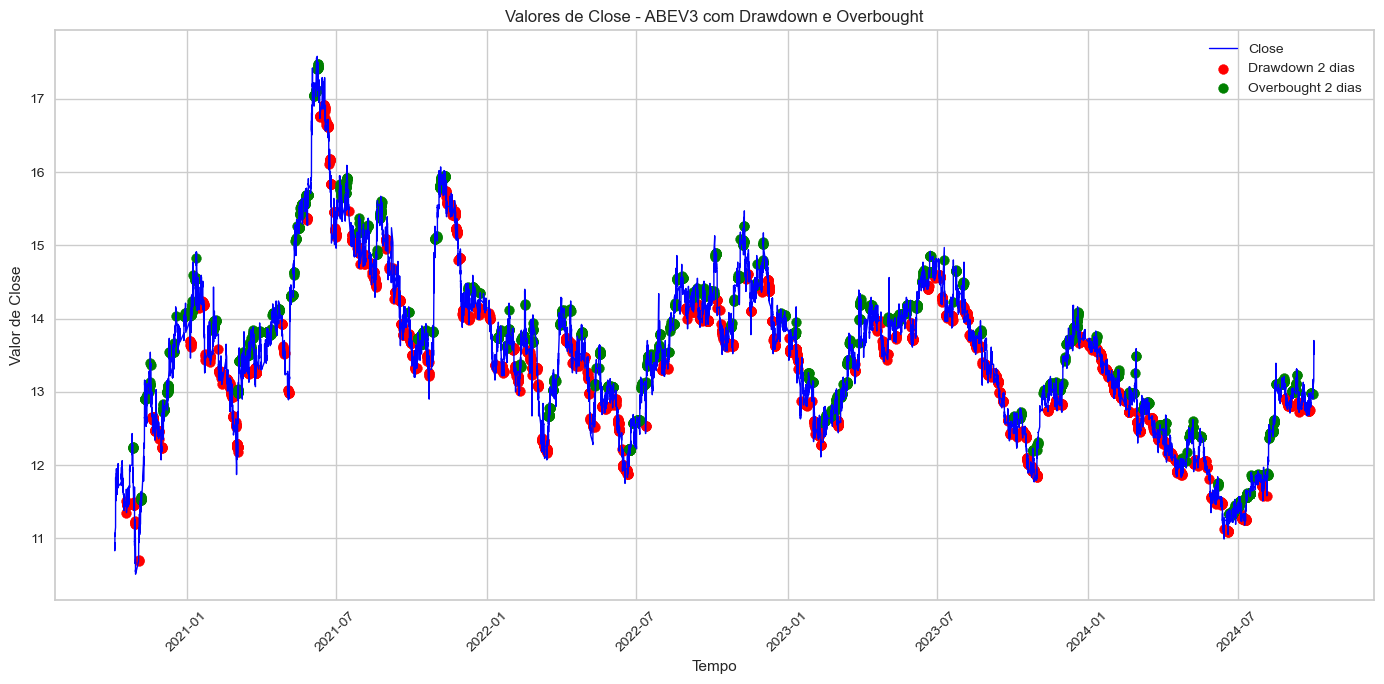

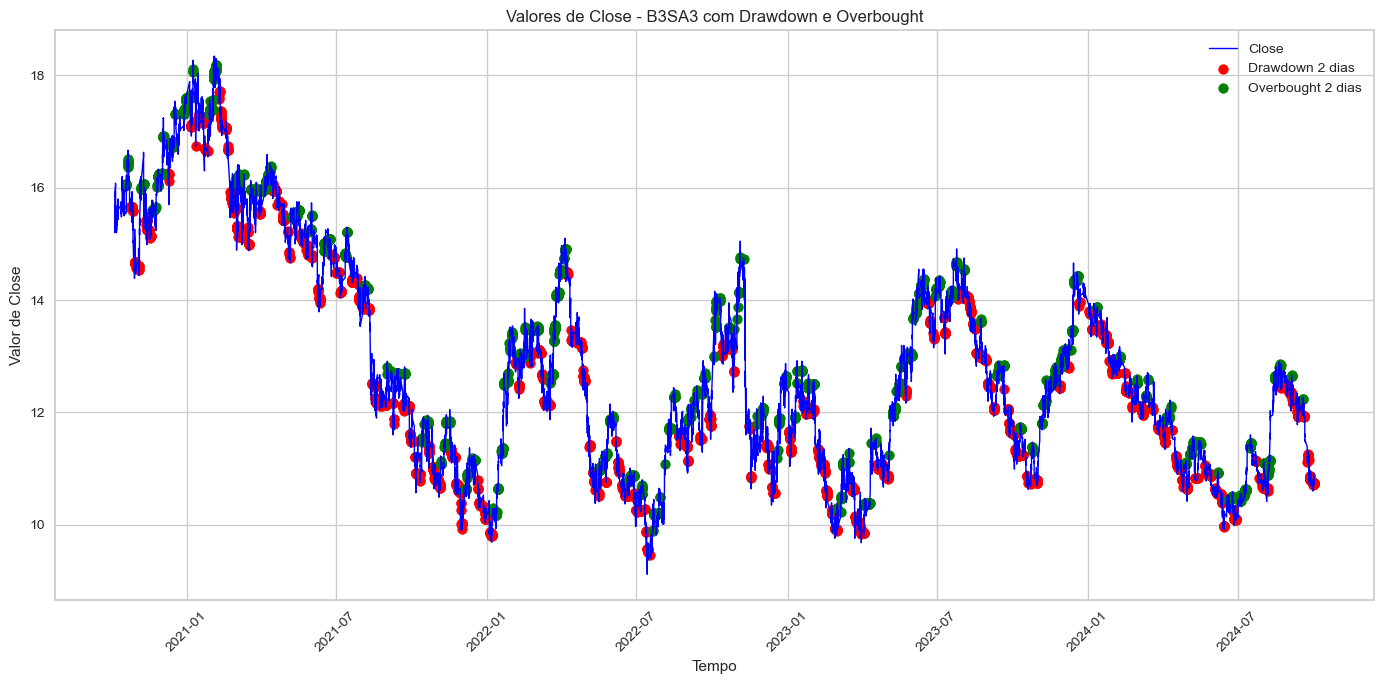

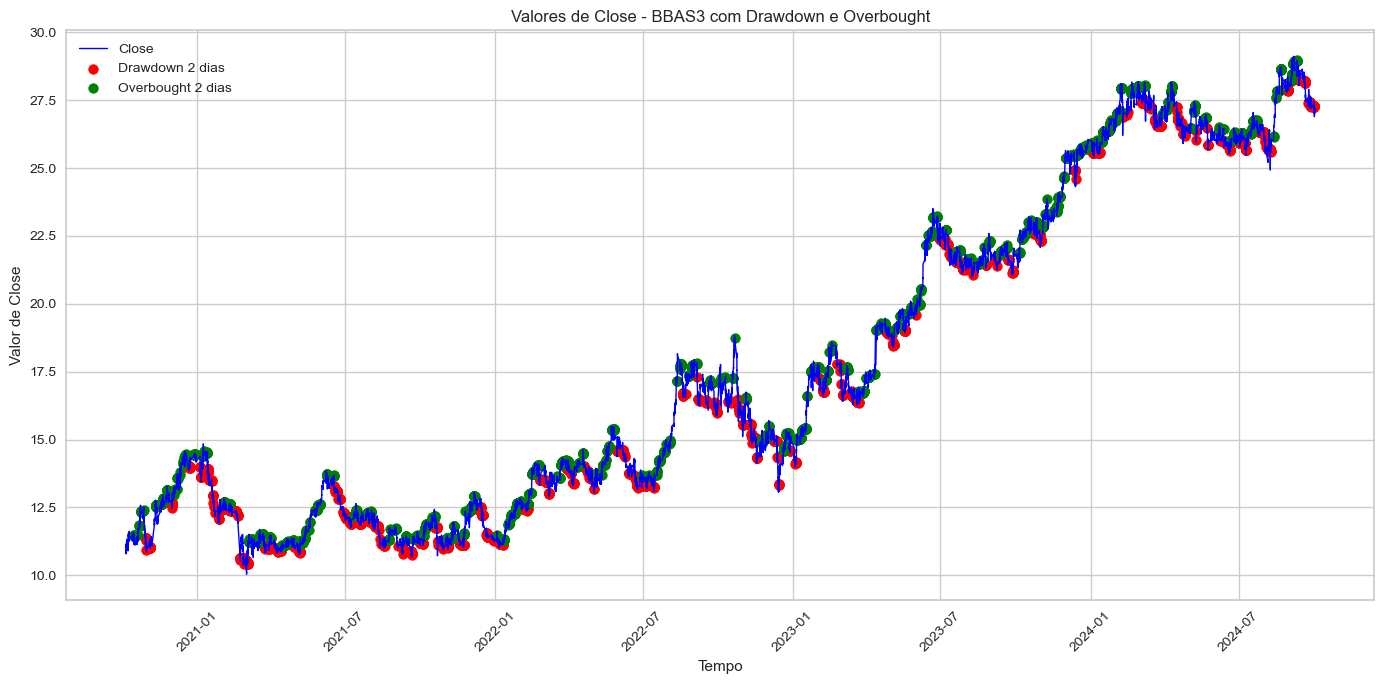

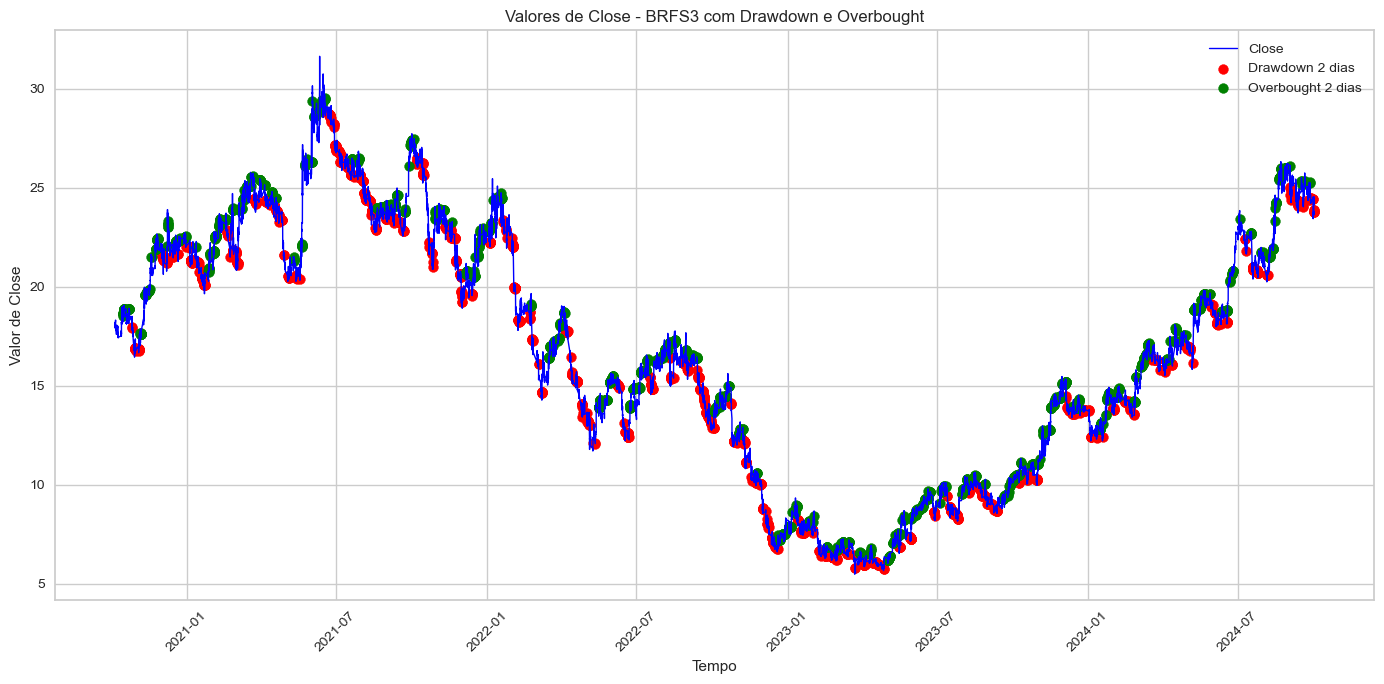

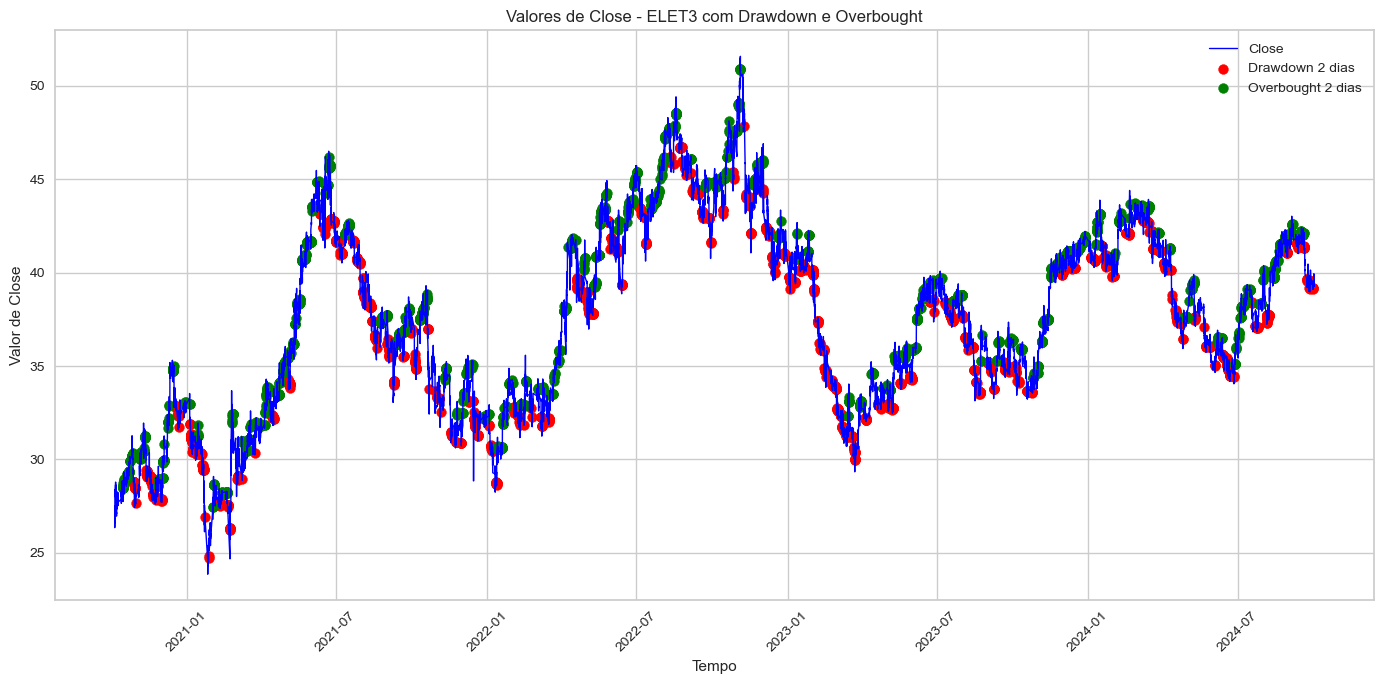

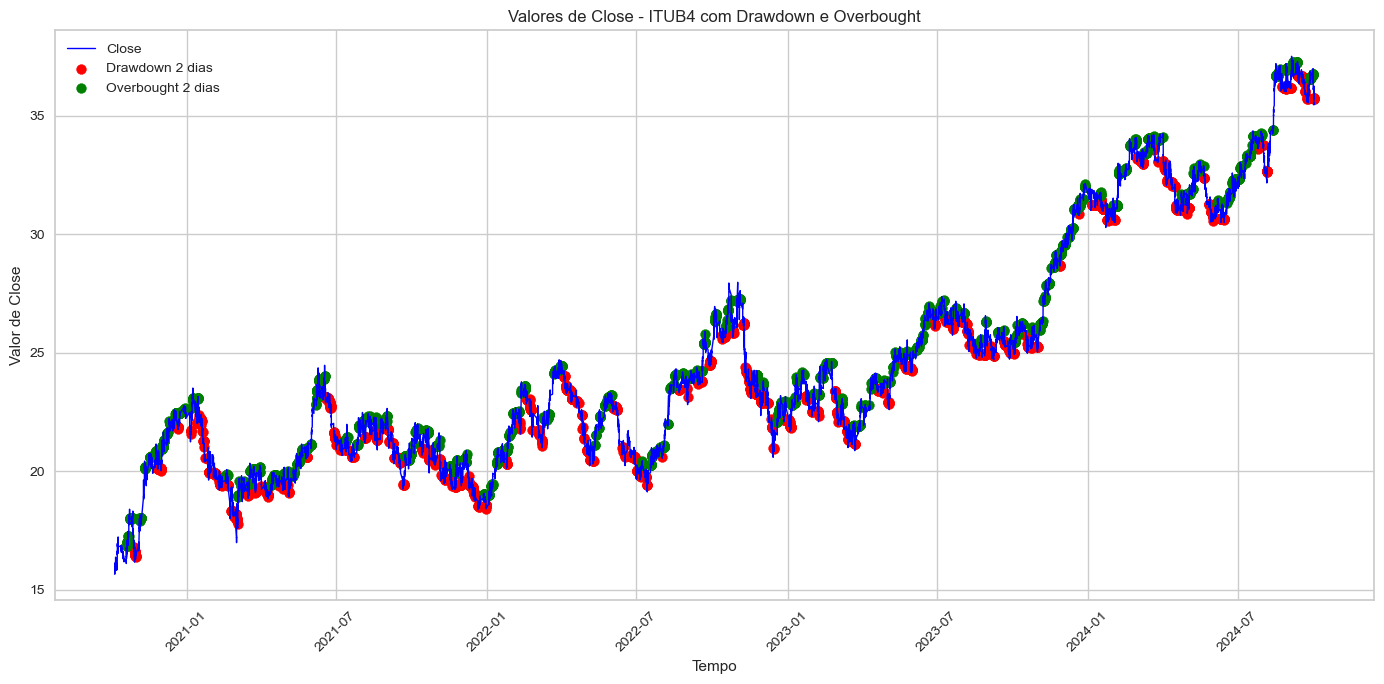

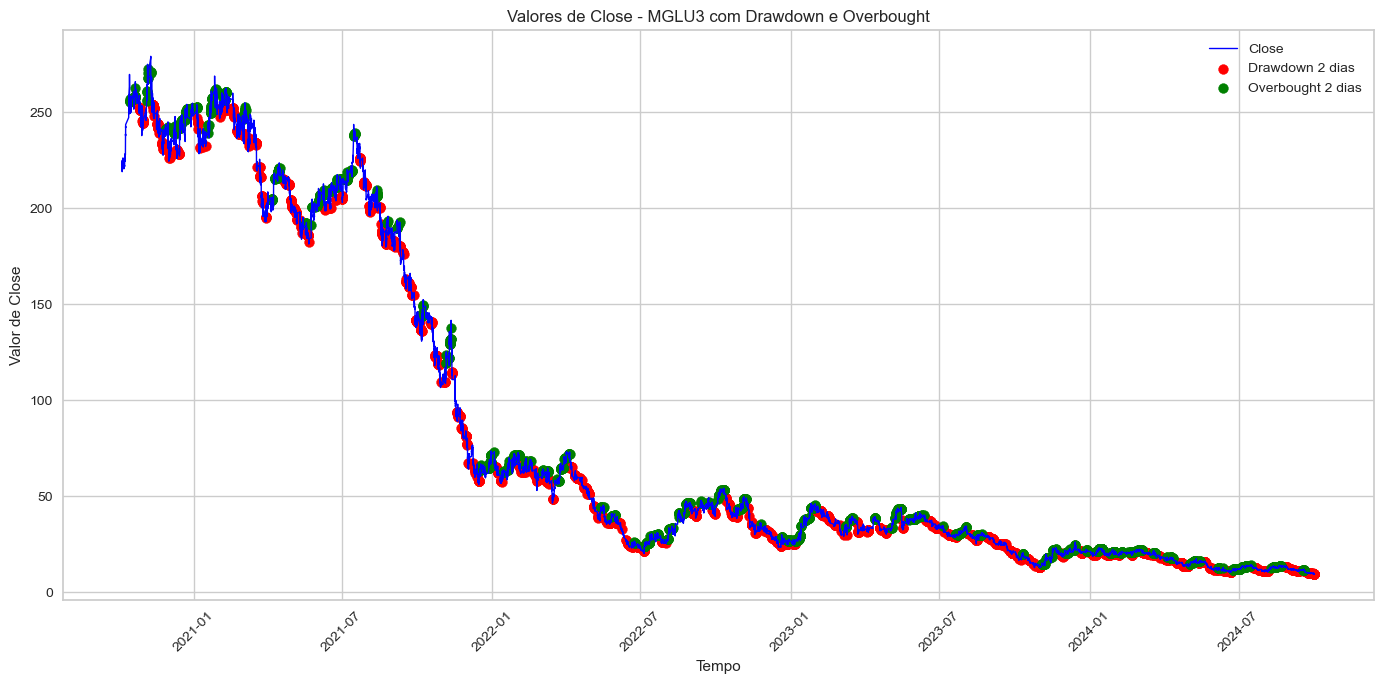

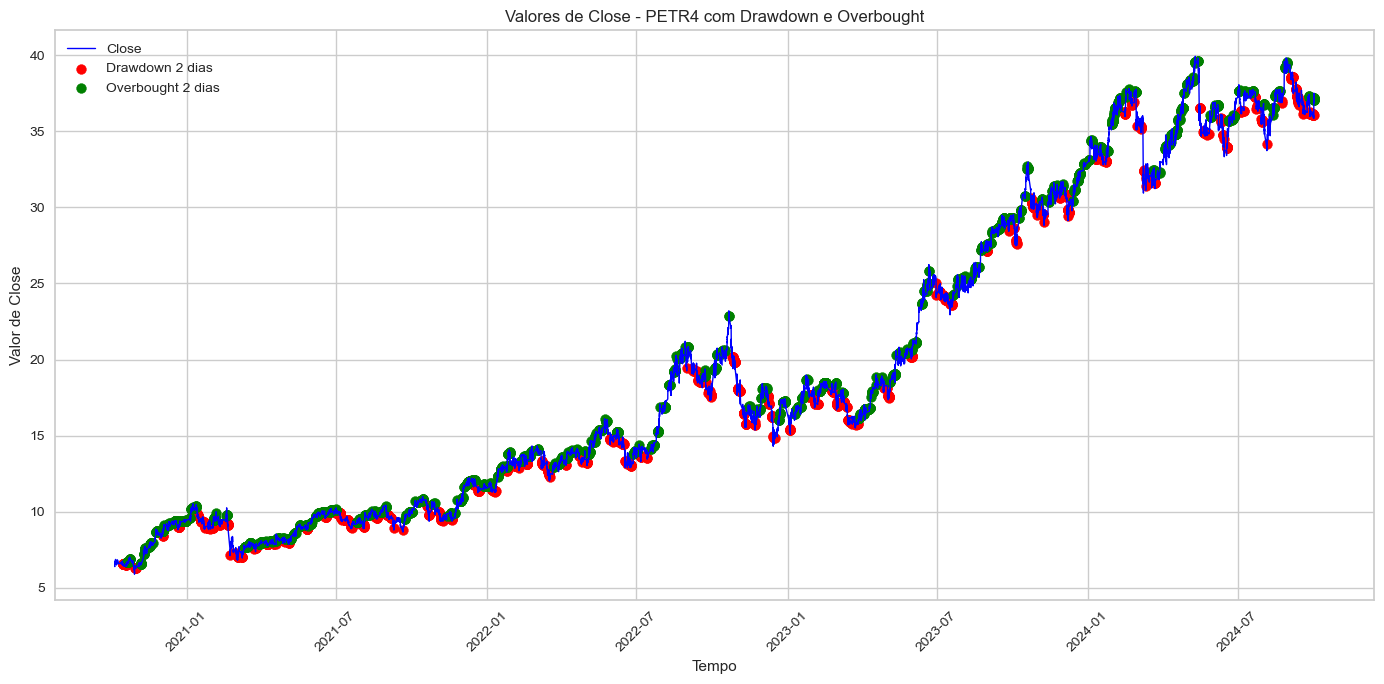

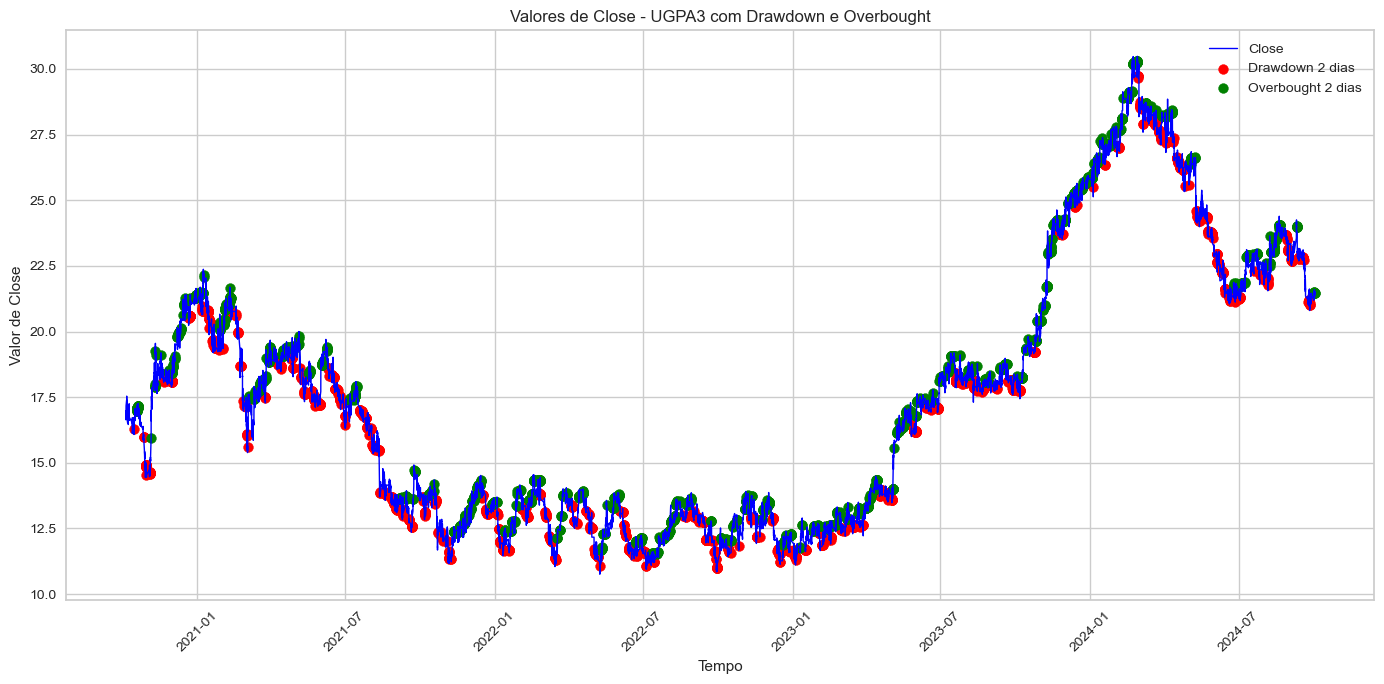

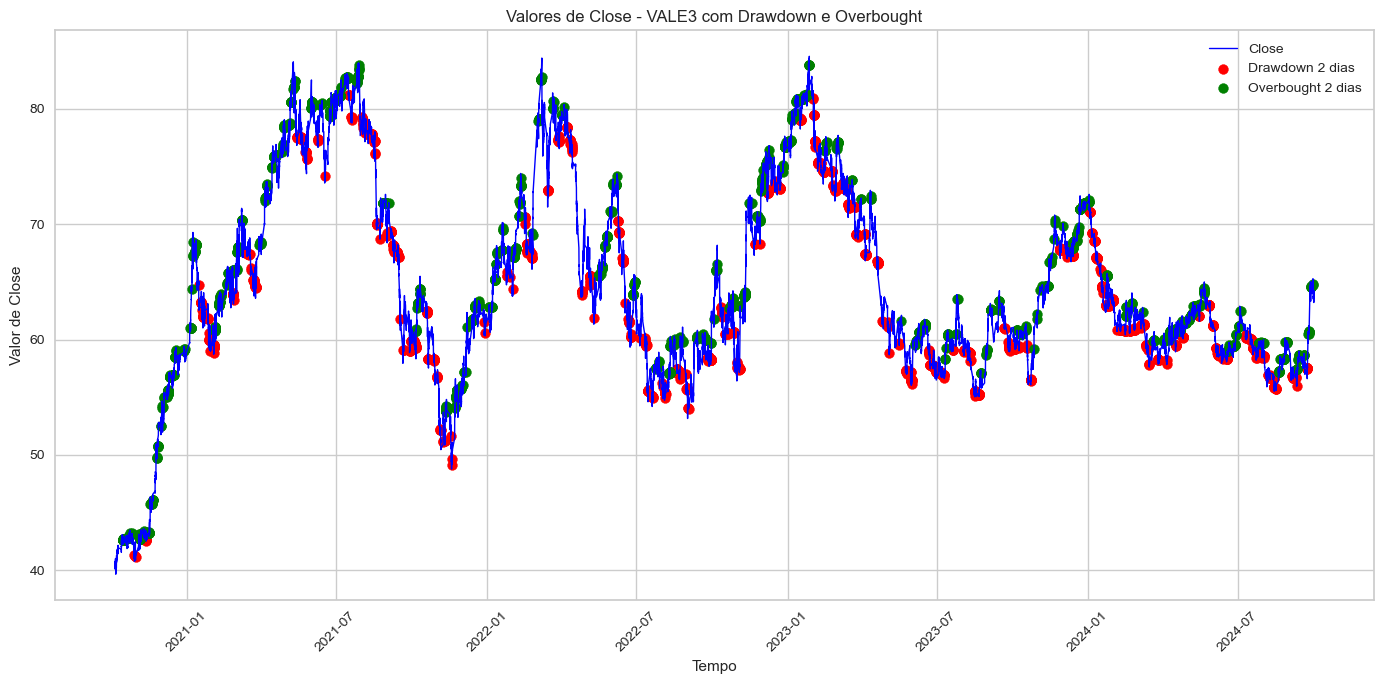

In [22]:
# Obter a lista de ações únicas
acoes_unicas = df_modelar['acao'].unique()

# Iterar sobre cada ação e gerar o gráfico
for acao in acoes_unicas:
    # Filtrar os dados para a ação atual
    df_acao = df_modelar[df_modelar['acao'] == acao]
    
    # Criar a figura e o eixo
    plt.figure(figsize=(14, 7))
    
    # Plotar a linha de 'close' ao longo do tempo
    plt.plot(df_acao['time'], 
             df_acao['close'], 
             label='Close', 
             color='blue', 
             linewidth=1)
    
    # Plotar os pontos de drawdown (True) em vermelho
    plt.scatter(df_acao['time'][df_acao['drawdown_2d']], 
                df_acao['close'][df_acao['drawdown_2d']], 
                color='red', 
                label='Drawdown 2 dias', 
                marker='o', 
                s=50)  # Ajuste o tamanho do ponto (s)

    # Plotar os pontos de overbought (True) em verde
    plt.scatter(df_acao['time'][df_acao['overbought_2d']], 
                df_acao['close'][df_acao['overbought_2d']], 
                color='green', 
                label='Overbought 2 dias', 
                marker='o', 
                s=50)  # Ajuste o tamanho do ponto (s)

    # Adicionar título e rótulos
    plt.title(f'Valores de Close - {acao} com Drawdown e Overbought')
    plt.xlabel('Tempo')
    plt.ylabel('Valor de Close')
    
    # Exibir a legenda
    plt.legend()
    
    # Ajustar o layout para melhor visualização
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

### Novo Drawdown e Overbought
<br>

##### Para resolver o problema de visão geral dos valores, foi adicionado uma verificação da média dos ultimos meses, podendo ser alterado pela variável *periodo_meses_media* e agora também ao invés de verificar se continua em queda/aumento dos valores seguidos, foi estipulado uma período de espera de nova classificação pela variável *periodo_verificacao_drawdown/overbought*, como isso vai reduzir drasticamente a quantidade de valores selecionados, também foi reduzido os percentis para pegar apenas os valores mais extremos.
<br>

##### Infelizmente a quantidade de valores selecionados vão ser bem pequenos, porém serão bem mais certivos também, levando em consideração o tipo de oscilação de valores do mercado de ações, ser certivo está se mostrando mais importânte do que o número de tentativas.

In [23]:
# Remover as colunas 'drawdown_2d' e 'overbought_2d' do DataFrame
df_modelar = df_modelar.drop(columns=['drawdown_2d', 'overbought_2d', 'volume_high_2d'])

#### Novo drawdown

In [24]:
# Variáveis que podem ser alteradas para personalizar as regras
# 43200 = 1 mês em minutos
# 10080 = 1 semana em minutos
# 1440 = 1 dia em minutos
periodo_meses_media = 259200         # Média móvel dos ultimos X minutos
min_periodo_meses = 86400            # Minimo de meses para média móvel (do contrário da False)
periodo_verificacao_drawdown = 4320  # Verifica se já tem drawdown True nos ultimos X minutos
periodo_percentil = 86400            # Usado para listar os X dias e verificar percentil
percentil_valor_drawdown = 0.05               # Valor do percentil

# Função para identificar drawdowns conforme as regras
def identificar_drawdown(df):
    # Calcular a média móvel
    media_movel = df['close'].rolling(window=periodo_meses_media, min_periods=min_periodo_meses).mean()
    
    # Condição 1: Verificar se o valor atual está abaixo da média
    abaixo_media_desvio = df['close'] < (media_movel)
    
    # Calcular o percentil dos últimos dias convertidos em minutos
    percentil_drawdown = df['close'].rolling(window=periodo_percentil, min_periods=periodo_percentil).quantile(percentil_valor_drawdown)
    
    # Condição 2: Verificar se o valor atual de 'close' está abaixo do percentil estipulado
    abaixo_percentil = df['close'] <= percentil_drawdown
    
    # Condição 3: Criar uma série para armazenar se já existe um drawdown nos últimos dias convertidos em minutos
    drawdown_periodo_verificado = np.full(len(df), False)
    
    # Identificar drawdowns que atendem ambas as condições e a condição dos últimos dias
    drawdowns_identificados = []
    for i in range(len(df)):
        # Verificar se a condição 1 e 2 são atendidas
        if abaixo_media_desvio.iloc[i] and abaixo_percentil.iloc[i]:
            # Se não houver um drawdown recente nos últimos dias (convertidos em minutos)
            if not any(drawdown_periodo_verificado[max(0, i - periodo_verificacao_drawdown):i]):
                drawdowns_identificados.append(True)
                # Atualizar a condição para evitar um novo drawdown nos próximos dias
                drawdown_periodo_verificado[i] = True
            else:
                drawdowns_identificados.append(False)
        else:
            drawdowns_identificados.append(False)
    
    # Retornar a série com os drawdowns identificados
    return pd.Series(drawdowns_identificados, index=df.index)

# Aplicar a função para cada ação do DataFrame
df_modelar['drawdown'] = df_modelar.groupby('acao', group_keys=False).apply(identificar_drawdown)

#### Novo overbought

In [25]:
# Variáveis que podem ser alteradas para personalizar as regras para overbought
percentil_valor_overbought = 0.95   # Percentil indica sobrecompra (overbought)

# Função para identificar overbought conforme as regras
def identificar_overbought(df):
    # Calcular a média móvel
    media_movel = df['close'].rolling(window=periodo_meses_media, min_periods=min_periodo_meses).mean()
    
    # Condição 1: Verificar se o valor atual está acima da média
    acima_media = df['close'] > media_movel
    
    # Calcular o percentil dos últimos dias convertidos em minutos
    percentil_overbought = df['close'].rolling(window=periodo_percentil, min_periods=periodo_percentil).quantile(percentil_valor_overbought)
    
    # Condição 2: Verificar se o valor atual de 'close' está acima do percentil estipulado
    acima_percentil = df['close'] >= percentil_overbought
    
    # Condição 3: Criar uma série para armazenar se já existe um overbought nos últimos dias convertidos em minutos
    overbought_periodo_verificado = np.full(len(df), False)
    
    # Identificar overboughts que atendem ambas as condições e a condição dos últimos dias
    overbought_identificados = []
    for i in range(len(df)):
        # Verificar se a condição 1 e 2 são atendidas
        if acima_media.iloc[i] and acima_percentil.iloc[i]:
            # Se não houver um overbought recente nos últimos dias (convertidos em minutos)
            if not any(overbought_periodo_verificado[max(0, i - periodo_verificacao_drawdown):i]):
                overbought_identificados.append(True)
                # Atualizar a condição para evitar um novo overbought nos próximos dias
                overbought_periodo_verificado[i] = True
            else:
                overbought_identificados.append(False)
        else:
            overbought_identificados.append(False)
    
    # Retornar a série com os overboughts identificados
    return pd.Series(overbought_identificados, index=df.index)

# Aplicar a função para cada ação do DataFrame
df_modelar['overbought'] = df_modelar.groupby('acao', group_keys=False).apply(identificar_overbought)

#### Resultado

In [26]:
# Calcular a quantidade absoluta de ocorrências True para drawdown
drawdown_count = df_modelar[df_modelar['drawdown']].groupby('acao')['drawdown'].count().reset_index()
drawdown_count.columns = ['acao', 'count_drawdown']

# Calcular a quantidade absoluta de ocorrências True para overbought
overbought_count = df_modelar[df_modelar['overbought']].groupby('acao')['overbought'].count().reset_index()
overbought_count.columns = ['acao', 'count_overbought']

# Combinar os dois DataFrames em um único DataFrame
count_df = pd.merge(drawdown_count, overbought_count, on='acao', how='outer')

##############################################################################

# Soma de 'close' para as linhas onde 'drawdown' é True
drawdown_sum = df_modelar[df_modelar['drawdown']].groupby('acao')['close'].sum().reset_index()
drawdown_sum.columns = ['acao', 'total_drawdown']

# Soma de 'close' para as linhas onde 'overbought' é True
overbought_sum = df_modelar[df_modelar['overbought']].groupby('acao')['close'].sum().reset_index()
overbought_sum.columns = ['acao', 'total_overbought']

# Combina os dois resultados em um único DataFrame
sum_df = pd.merge(drawdown_sum, overbought_sum, on='acao', how='outer').fillna(0)

##############################################################################

# Combina os dois DataFrames criados anteriormente
prop_df = pd.merge(count_df, sum_df, on='acao', how='outer').fillna(0)

# Calcular proporções
prop_df['prop_draw'] = prop_df['total_drawdown'] / prop_df['count_drawdown'].replace(0, np.nan)
prop_df['prop_bought'] = prop_df['total_overbought'] / prop_df['count_overbought'].replace(0, np.nan)
prop_df['result'] = prop_df['prop_bought'] - prop_df['prop_draw']

# Exibir o resultado final
display(prop_df)
result_final = prop_df['result'].sum()
print(f'Somatória de todas ações: {result_final}')

acao  count_drawdown  count_overbought  total_drawdown  total_overbought  \
0  ABEV3            22.0               8.0          274.16            116.77   
1  B3SA3            20.0               9.0          220.89            128.24   
2  BBAS3             3.0              38.0           34.89            797.44   
3  BRFS3            22.0              17.0          271.23            312.04   
4  ELET3             8.0              18.0          261.38            780.16   
5  ITUB4             2.0              29.0           37.86            858.36   
6  MGLU3            33.0               0.0         1897.54              0.00   
7  UGPA3            17.0              20.0          212.10            432.96   
8  VALE3            14.0               6.0          789.73            477.62   
9  PETR4             0.0              46.0            0.00           1021.06   

   prop_draw  prop_bought     result  
0  12.461818    14.596250   2.134432  
1  11.044500    14.248889   3.204389  
2  11.630000    20.985263   9.355263  
3  12.328636    18.355294   6.026658  
4  32.672500    43.342222  10.669722  
5  18.930000    29.598621  10.668621  
6  57.501212          NaN        NaN  
7  12.476471    21.648000   9.171529  
8  56.409286    79.603333  23.194048  
9        NaN    22.196957        NaN

Somatória de todas ações: 74.42466156166586


#### O gráfico abaixo mostra os resultados proporcionais do total de momentos de compra e venda de ações, sendo as ações com maiores valores as que apresentam maiores oportunidade ao longo dos ultimos anos.

In [27]:
# Ordenar o DataFrame pelos resultados
prop_df_sorted = prop_df.sort_values(by='result')

# Criar o gráfico de barras
fig = px.bar(
    prop_df_sorted,
    x='acao',  # Eixo X com as ações
    y='result',  # Eixo Y com os resultados
    title='Resultado por Ação - Ações com maiores oportunidades',
    labels={'acao': 'Ação', 'result': 'Resultado'},
    color='result',  # Usar 'result' para colorir as barras
    color_continuous_scale=px.colors.sequential.Viridis  # Opção de escala de cores
)

# Exibir o gráfico
fig.show()

#### Resultado Gráfico

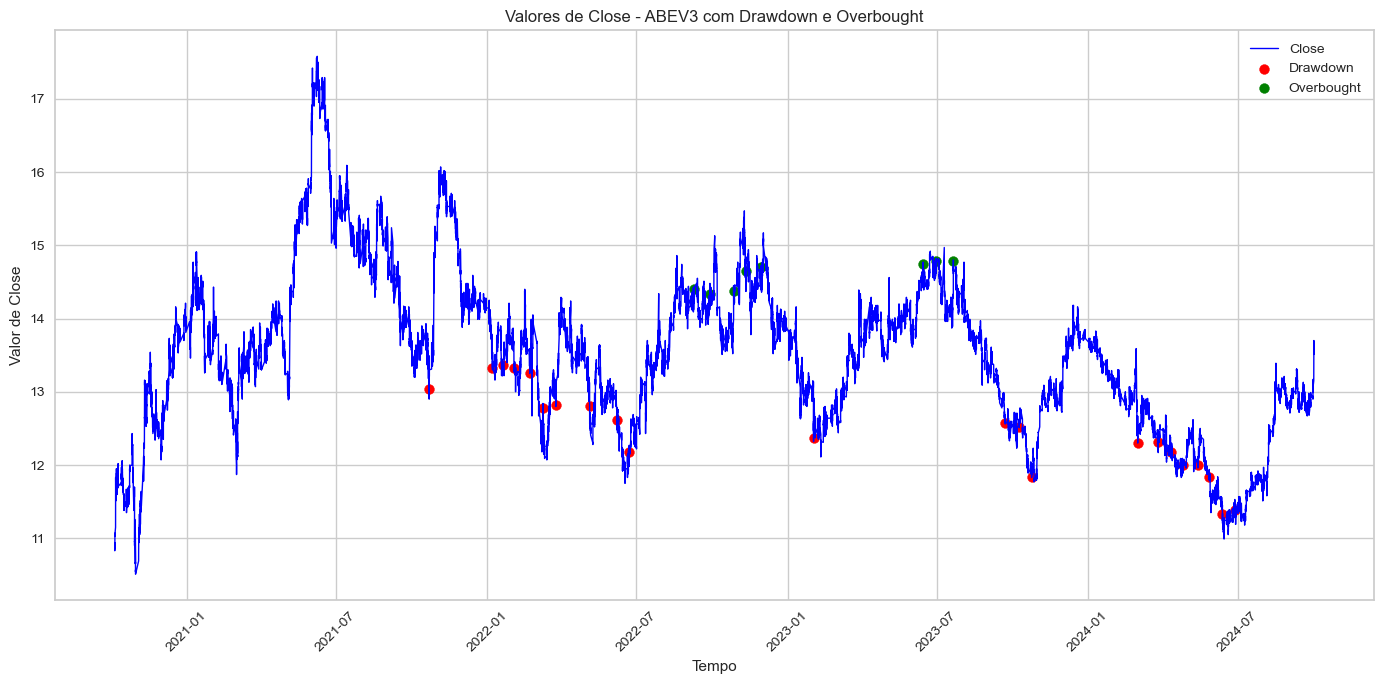

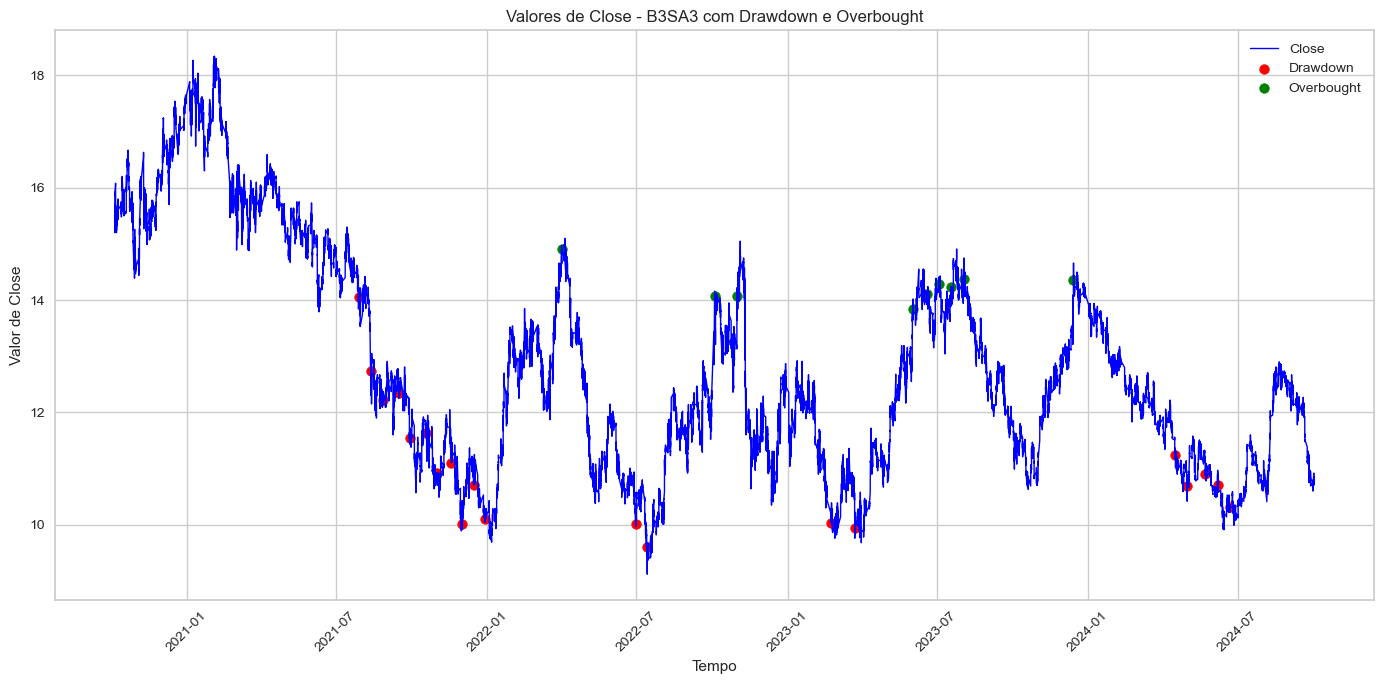

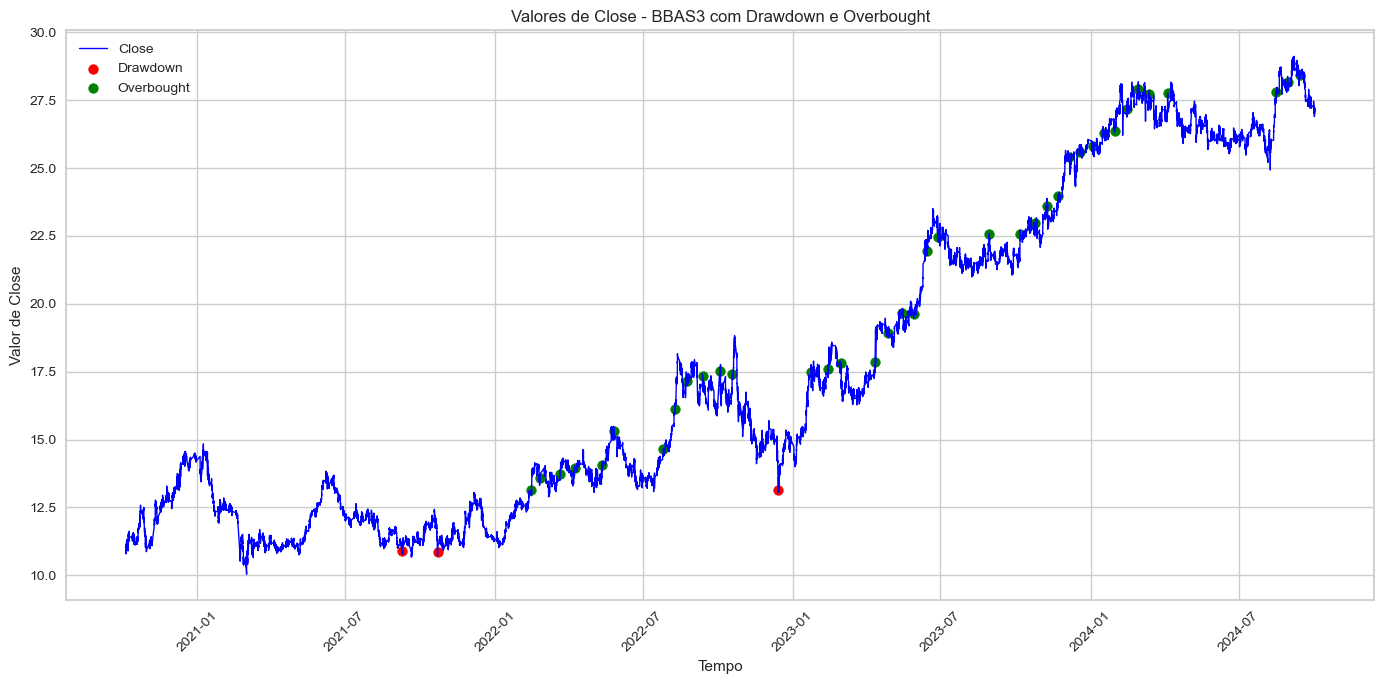

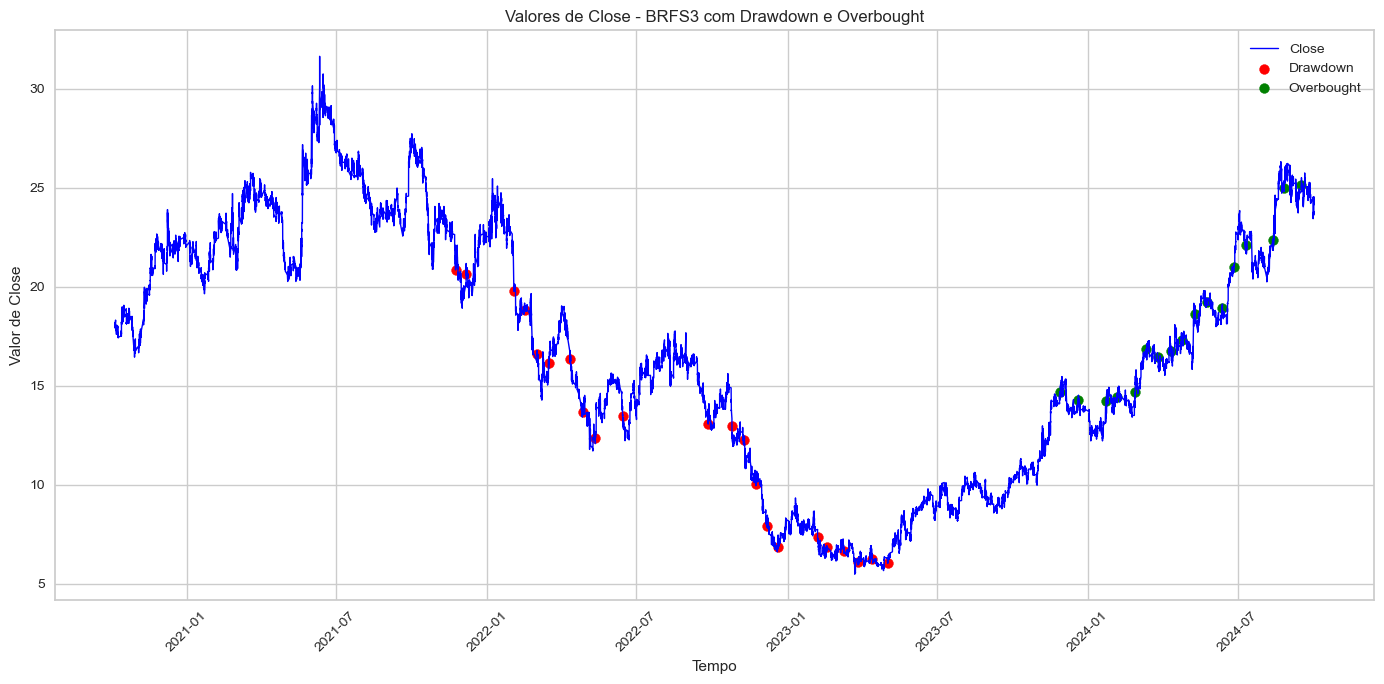

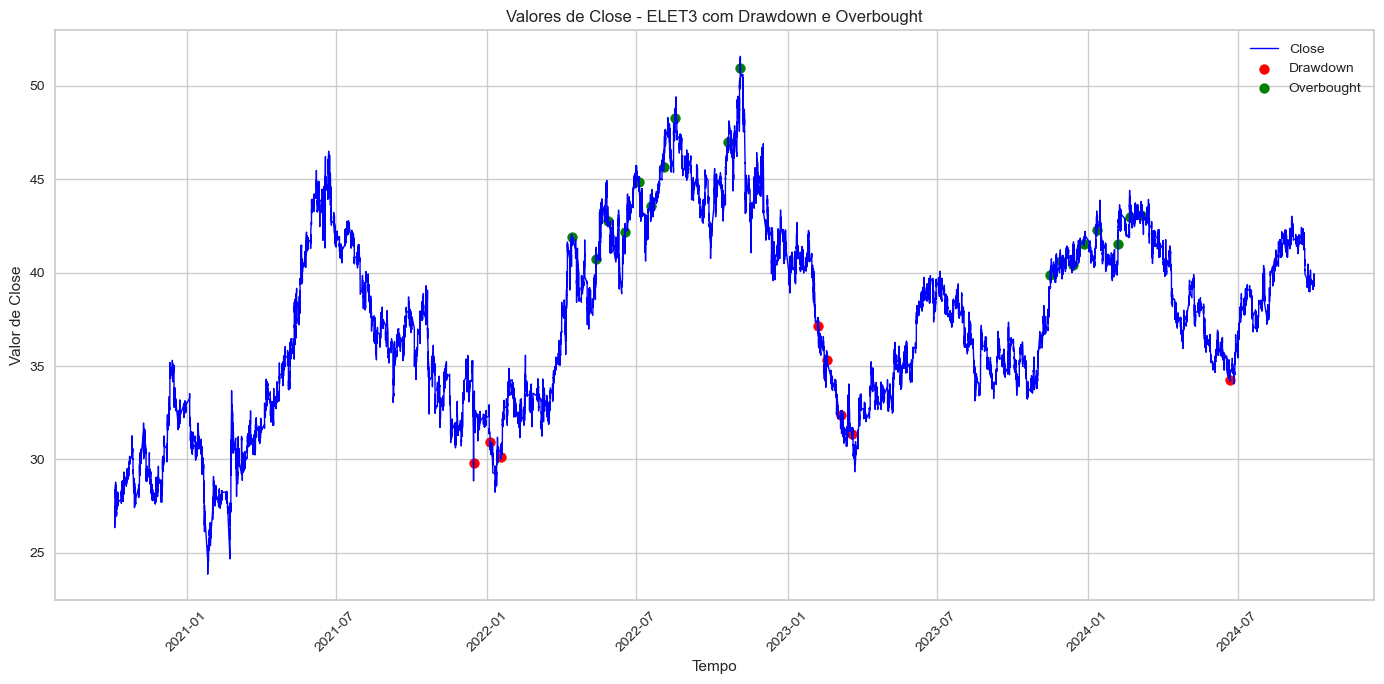

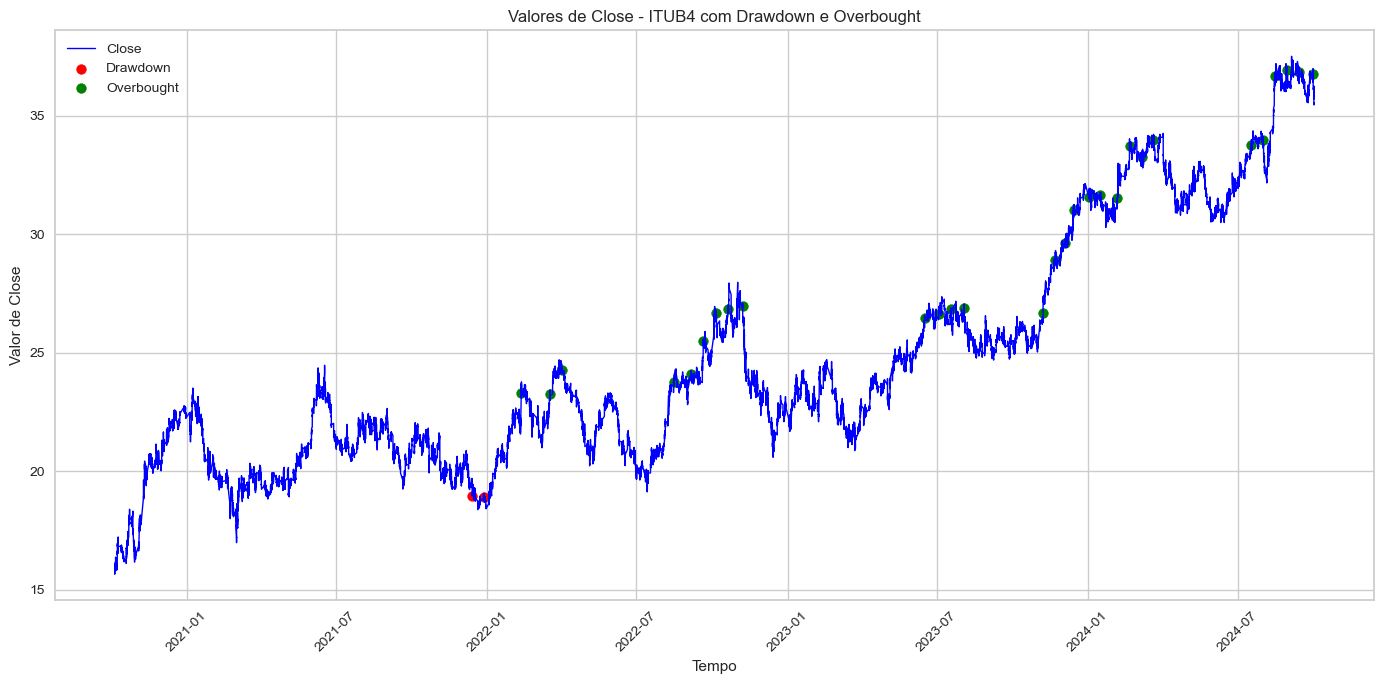

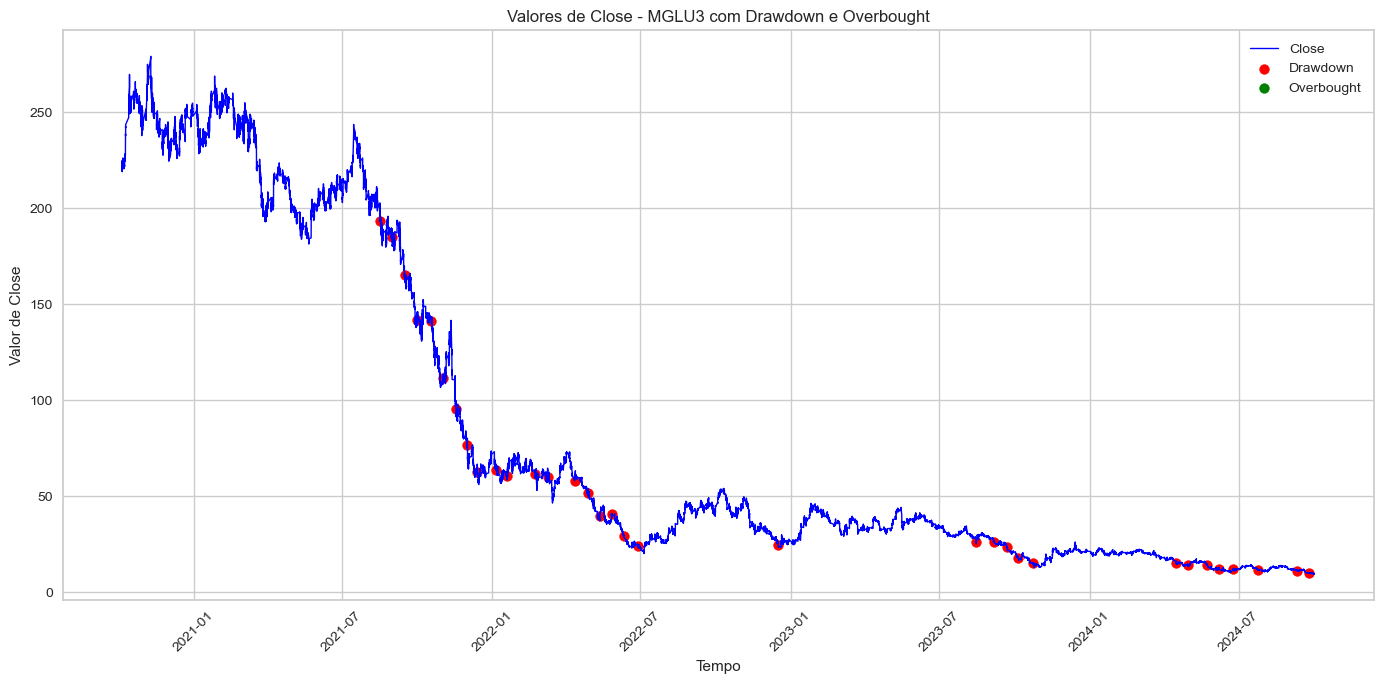

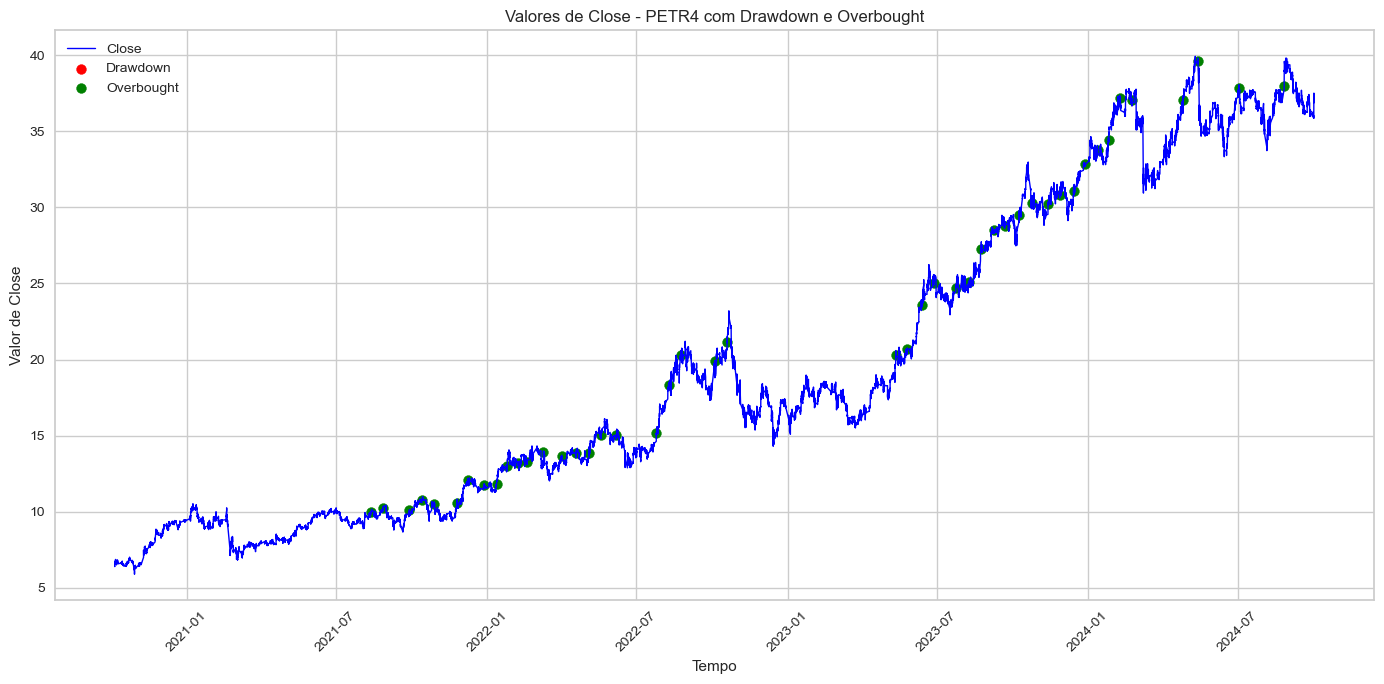

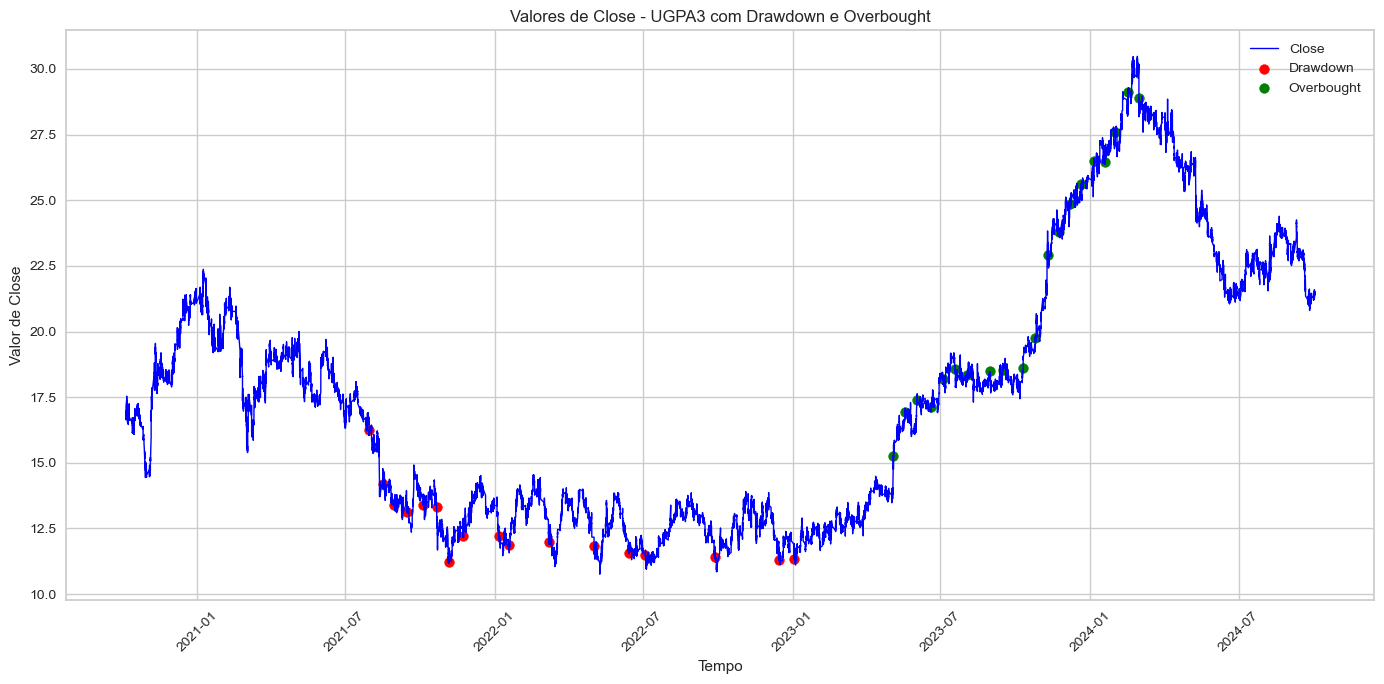

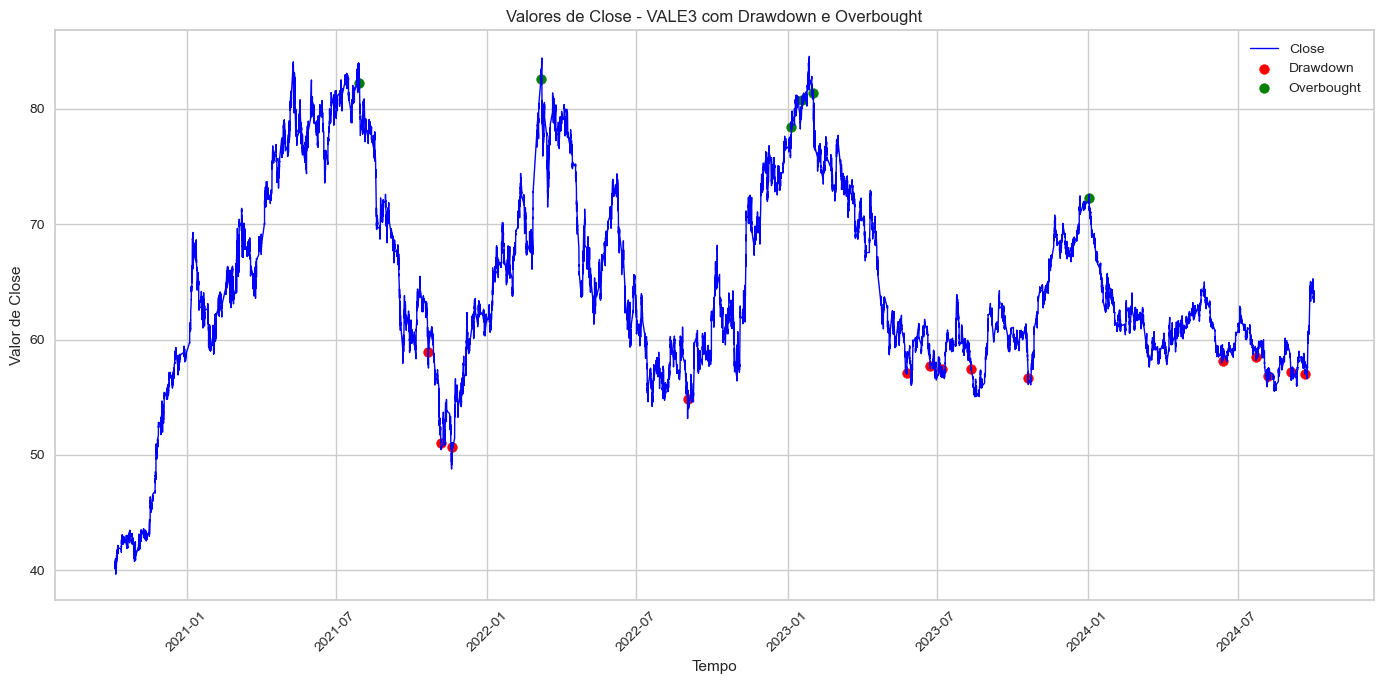

In [28]:
# Obter a lista de ações únicas
acoes_unicas = df_modelar['acao'].unique()

# Iterar sobre cada ação e gerar o gráfico
for acao in acoes_unicas:
    # Filtrar os dados para a ação atual
    df_acao = df_modelar[df_modelar['acao'] == acao]
    
    # Criar a figura e o eixo
    plt.figure(figsize=(14, 7))
    
    # Plotar a linha de 'close' ao longo do tempo
    plt.plot(df_acao['time'], 
             df_acao['close'], 
             label='Close', 
             color='blue', 
             linewidth=1)
    
    # Plotar os pontos de drawdown (True) em vermelho
    plt.scatter(df_acao['time'][df_acao['drawdown']], 
                df_acao['close'][df_acao['drawdown']], 
                color='red', 
                label='Drawdown', 
                marker='o', 
                s=50)  # Ajuste o tamanho do ponto (s)

    # Plotar os pontos de overbought (True) em verde
    plt.scatter(df_acao['time'][df_acao['overbought']], 
                df_acao['close'][df_acao['overbought']], 
                color='green', 
                label='Overbought', 
                marker='o', 
                s=50)  # Ajuste o tamanho do ponto (s)

    # Adicionar título e rótulos
    plt.title(f'Valores de Close - {acao} com Drawdown e Overbought')
    plt.xlabel('Tempo')
    plt.ylabel('Valor de Close')
    
    # Exibir a legenda
    plt.legend()
    
    # Ajustar o layout para melhor visualização
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

#### Resultados Vazios e estratégia de negócio
<br>

##### Os valores de tempo para análise e classificação de drawdown e overbought foram revisados várias vezes, analisando a quantidade de classificações, os gráficos e o resultado dos valores proporcionais de compra e venda. Como foi visto algumas ações apresentam maior oportunidade de compra e venda que outros, mas também houve casos em que não houve classificação de drawdown, que são ações que estão em constante aumento ou não houve classificação de overbought, que são ações que estão em constante declinio.
<br>

##### Esses são casos extremos, que valem apena ser destacados como uma outra estratégia de investimento, mas para o caso em questão de compra e venda de ações eles não são interessantes, para isso seria mais interessante ações que tem uma oscilação, dessa forma aparecem maiores oportunidades de compra e venda em uma janela de tempo viável ao mesmo tempo que seja um valor confiável.

##### Removendo as ações que não tem oscilações em tempo hábil

In [29]:
# Identificar as ações com NaN na coluna 'result'
acoes_nan = prop_df[prop_df['result'].isna()]['acao']

# Remover as ações com NaN do DataFrame df_modelar
df_modelar = df_modelar[~df_modelar['acao'].isin(acoes_nan)]

### Novo volume
<br>

##### Após a remoção das ações com classificação zerada é possível calcular também o quão distânte em minutos cada linha está dos valores classificados.
<br>

##### Aproveitando a mesma lógica para selecionar os picos de volumes foi possível melhorar essa relação também. Isso quer dizer que vai facilitar também para o separar melhor esses valores e verificar as oportunidades. 

In [30]:
percentil_valor_high_volume = 0.95   # Percentil que indique volume alto

# Função para identificar high_volume conforme as regras
def identificar_high_volume(df):
    # Calcular a média móvel do volume
    media_movel_volume = df['real_volume'].rolling(window=periodo_meses_media, min_periods=min_periodo_meses).mean()
    
    # Condição 1: Verificar se o volume atual está acima da média móvel
    acima_media_volume = df['real_volume'] > media_movel_volume
    
    # Calcular o percentil dos últimos dias convertidos em minutos para o volume
    percentil_99_volume = df['real_volume'].rolling(window=periodo_percentil, min_periods=periodo_percentil).quantile(percentil_valor_high_volume)
    
    # Condição 2: Verificar se o volume atual está acima do percentil estipulado
    acima_percentil_volume = df['real_volume'] >= percentil_99_volume
    
    # Condição 3: Criar uma série para armazenar se já existe um high_volume nos últimos dias convertidos em minutos
    high_volume_periodo_verificado = np.full(len(df), False)
    
    # Identificar high_volumes que atendem ambas as condições e a condição dos últimos dias
    high_volume_identificados = []
    for i in range(len(df)):
        # Verificar se a condição 1 e 2 são atendidas
        if acima_media_volume.iloc[i] and acima_percentil_volume.iloc[i]:
            # Se não houver um high_volume recente nos últimos dias (convertidos em minutos)
            if not any(high_volume_periodo_verificado[max(0, i - periodo_verificacao_drawdown):i]):
                high_volume_identificados.append(True)
                # Atualizar a condição para evitar um novo high_volume nos próximos dias
                high_volume_periodo_verificado[i] = True
            else:
                high_volume_identificados.append(False)
        else:
            high_volume_identificados.append(False)
    
    # Retornar a série com os high_volumes identificados
    return pd.Series(high_volume_identificados, index=df.index)

# Aplicar a função para cada ação do DataFrame
df_modelar['high_volume'] = df_modelar.groupby('acao', group_keys=False).apply(identificar_high_volume)

In [31]:
# Ativando o tqdm para pandas
tqdm.pandas()

# Função otimizada para calcular a distância em minutos
def calcular_distancia_eficiente(linha, drawdown_times):
    linha = np.datetime64(linha, 'm')
    return np.min(np.abs(drawdown_times - linha))

# Função para aplicar o cálculo de distância por ação
def calcular_distancia_drawdown_por_acao(grupo):
    drawdown_times = grupo.loc[grupo['drawdown'] == True, 'time'].values.astype('datetime64[m]')
    grupo['distancia_drawdown_min'] = grupo['time'].progress_apply(lambda x: calcular_distancia_eficiente(x, drawdown_times))
    return grupo

# Aplicar a função para cada grupo de ação
df_modelar = df_modelar.groupby('acao').apply(calcular_distancia_drawdown_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar['distancia_drawdown_min'] = df_modelar['distancia_drawdown_min'].dt.total_seconds() // 60
df_modelar['distancia_drawdown_min'] = df_modelar['distancia_drawdown_min'].astype(int)

# Calcula as médias dos valores 'True' e 'False' por ação
df_media = df_modelar.groupby(['acao', 'high_volume'])['distancia_drawdown_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media['percentual_diferenca'] = ((df_media[False] - df_media[True]) / df_media[False]) * 100
df_media

100%|██████████| 426697/426697 [00:10<00:00, 42582.19it/s]


high_volume          False           True  percentual_diferenca
acao                                                           
ABEV3        109528.552626   52504.379747             52.063294
B3SA3        108113.666496   79489.192308             26.476277
BBAS3        313092.095700  318509.794872             -1.730385
BRFS3        223313.473918  179448.115385             19.642952
ELET3        187593.110326  129589.141026             30.920096
ITUB4        595559.429557  641078.898734             -7.643145
UGPA3        251249.143597  259576.153846             -3.314244
VALE3        126931.145270   74259.371795             41.496335

In [32]:
# Ativando o tqdm para pandas
tqdm.pandas()

# Função otimizada para calcular a distância em minutos
def calcular_distancia_eficiente(linha, overbought_times):
    linha = np.datetime64(linha, 'm')
    return np.min(np.abs(overbought_times - linha))

# Função para aplicar o cálculo de distância por ação
def calcular_distancia_overbought_por_acao(grupo):
    overbought_times = grupo.loc[grupo['overbought'] == True, 'time'].values.astype('datetime64[m]')
    grupo['distancia_overbought_min'] = grupo['time'].progress_apply(lambda x: calcular_distancia_eficiente(x, overbought_times))
    return grupo

# Aplicar a função para cada grupo de ação
df_modelar = df_modelar.groupby('acao').apply(calcular_distancia_overbought_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar['distancia_overbought_min'] = df_modelar['distancia_overbought_min'].dt.total_seconds() // 60
df_modelar['distancia_overbought_min'] = df_modelar['distancia_overbought_min'].astype(int)


# Calcula as médias dos valores 'True' e 'False' por ação
df_media = df_modelar.groupby(['acao', 'high_volume'])['distancia_overbought_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media['percentual_diferenca'] = ((df_media[False] - df_media[True]) / df_media[False]) * 100

df_media

100%|██████████| 426697/426697 [00:09<00:00, 42868.52it/s]


high_volume          False           True  percentual_diferenca
acao                                                           
ABEV3        349770.074899  238481.860759             31.817534
B3SA3        212595.809761  122023.897436             42.602868
BBAS3        133394.525400   41371.064103             68.985936
BRFS3        652082.848211  456849.807692             29.939913
ELET3        210655.616979  115494.910256             45.173591
ITUB4        144277.518706   54806.215190             62.013337
UGPA3        461694.646294  291307.987179             36.904621
VALE3        142668.705812  121544.833333             14.806241

### Conclusões
<br>

##### Os valores das ações variam muito e em quantidades baixas em sua maioria esmagadora, então para se ter um retorno em um período curto de tempo seria muito arriscado sem uma abordagem estatistica muito clara por trás e fundamentada mais em conhecimento de mercado. 
<br>

##### Contudo ao olhar em uma janela de tempo maior é possível verificar quais ações tem uma maior variação, com varias altas e baixas, assim como verificar as ações que estão em uma queda constante ou aumento constante e ter uma estratégia de investimento mais segura.
<br>

##### Desde o inicio estava imaginando o uso de aprendizado de máquina, algumas colunas até criei pensando em uma melhor porformance do modelo, porém visto que a porcentagem de rotulagens True são muito baixas(as vezes menor que 0.00%), qualquer erro do modelo iria custar muito no resultado e a classificação já está sendo feita em tempo real por minuto. 

## Obs: O código abaixo seria apenas para se aprofundar, deixei caso alguém queira continuar explorando.
<br>

#### Aqui em baixo eu tento verificar uma abordagem de compra e venda mais rápida, porém tento ter uma certeza de retorno (o que falho mizeravelmente), adiciono uma coluna que mostra em minutos a distância até o próximo high_volume que seja True e tento fazer intersecções de estratégias, exemplo:<br>
##### Selecionar as linhas onde o overbought seja True, que esteja a um valor menor ou igual a distância em minutos do ultimo drawdown e também que esteja próximo a um high_volume.

<br>

##### Não tive bons resultados, como a maioria dos traders (Se fosse assim todo mundo seria rico), porém pelo que estudei são bons parâmetros para se começar a analisar.

### Estratégia a curto prazo

In [33]:
df_modelar_swing = df_modelar.copy()

# Variáveis que podem ser alteradas para personalizar as regras
# 43200 = 1 mês em minutos
# 10080 = 1 semana em minutos
# 1440 = 1 dia em minutos
periodo_meses_media = 43200          # Média móvel dos últimos X minutos
min_periodo_meses = 43200            # Mínimo de meses para média móvel (do contrário da False)
periodo_verificacao_drawdown = 1440  # Verifica se já tem drawdown True nos últimos X minutos
periodo_percentil = 10080            # Usado para listar os X dias e verificar percentil

percentil_valor_drawdown = 0.05       # Valor do percentil
percentil_valor_overbought = 0.95     # Percentil indica sobrecompra (overbought)
percentil_valor_high_volume = 0.95

# Aplicar a função para identificar drawdown
df_modelar_swing['drawdown'] = df_modelar_swing.groupby('acao', group_keys=False).apply(identificar_drawdown)
# Aplicar a função para identificar overbought
df_modelar_swing['overbought'] = df_modelar_swing.groupby('acao', group_keys=False).apply(identificar_overbought)
# Aplicar a função para cada ação do DataFrame
df_modelar_swing['high_volume'] = df_modelar_swing.groupby('acao', group_keys=False).apply(identificar_high_volume)

In [34]:
# Aplicar a função para cada grupo de ação
df_modelar_swing = df_modelar_swing.groupby('acao').apply(calcular_distancia_drawdown_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar_swing['distancia_drawdown_min'] = df_modelar_swing['distancia_drawdown_min'].dt.total_seconds() // 60
df_modelar_swing['distancia_drawdown_min'] = df_modelar_swing['distancia_drawdown_min'].astype(int)

100%|██████████| 426697/426697 [00:10<00:00, 41995.56it/s]


In [35]:
# Aplicar a função para cada grupo de ação
df_modelar_swing = df_modelar_swing.groupby('acao').apply(calcular_distancia_overbought_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar_swing['distancia_overbought_min'] = df_modelar_swing['distancia_overbought_min'].dt.total_seconds() // 60
df_modelar_swing['distancia_overbought_min'] = df_modelar_swing['distancia_overbought_min'].astype(int)

100%|██████████| 426697/426697 [00:10<00:00, 41861.02it/s]


In [36]:
# Calcular a quantidade absoluta de ocorrências True para drawdown
drawdown_count = df_modelar_swing[df_modelar_swing['drawdown']].groupby('acao')['drawdown'].count().reset_index()
drawdown_count.columns = ['acao', 'count_drawdown']

# Calcular a quantidade absoluta de ocorrências True para overbought
overbought_count = df_modelar_swing[df_modelar_swing['overbought']].groupby('acao')['overbought'].count().reset_index()
overbought_count.columns = ['acao', 'count_overbought']

# Combinar os dois DataFrames em um único DataFrame
count_df = pd.merge(drawdown_count, overbought_count, on='acao', how='outer')

##############################################################################

# Soma de 'close' para as linhas onde 'drawdown' é True
drawdown_sum = df_modelar_swing[df_modelar_swing['drawdown']].groupby('acao')['close'].sum().reset_index()
drawdown_sum.columns = ['acao', 'total_drawdown']

# Soma de 'close' para as linhas onde 'overbought' é True
overbought_sum = df_modelar_swing[df_modelar_swing['overbought']].groupby('acao')['close'].sum().reset_index()
overbought_sum.columns = ['acao', 'total_overbought']

# Combina os dois resultados em um único DataFrame
sum_df = pd.merge(drawdown_sum, overbought_sum, on='acao', how='outer').fillna(0)

##############################################################################

# Combina os dois DataFrames criados anteriormente
prop_df = pd.merge(count_df, sum_df, on='acao', how='outer').fillna(0)

# Calcular proporções
prop_df['prop_draw'] = prop_df['total_drawdown'] / prop_df['count_drawdown'].replace(0, np.nan)
prop_df['prop_bought'] = prop_df['total_overbought'] / prop_df['count_overbought'].replace(0, np.nan)
prop_df['result'] = prop_df['prop_bought'] - prop_df['prop_draw']

# Exibir o resultado final
display(prop_df)
result_final = prop_df['result'].sum()
print(f'Somatória de todas ações: {result_final}')

acao  count_drawdown  count_overbought  total_drawdown  total_overbought  \
0  ABEV3              78                61         1017.78            865.48   
1  B3SA3              83                51          977.97            660.67   
2  BBAS3              42                95          687.05           1826.21   
3  BRFS3              55                73          800.75           1242.38   
4  ELET3              57                80         2043.16           3214.74   
5  ITUB4              52                98         1184.71           2644.29   
6  UGPA3              68                85         1105.19           1593.83   
7  VALE3              69                63         4220.83           4511.89   

   prop_draw  prop_bought     result  
0  13.048462    14.188197   1.139735  
1  11.782771    12.954314   1.171543  
2  16.358333    19.223263   2.864930  
3  14.559091    17.018904   2.459813  
4  35.844912    40.184250   4.339338  
5  22.782885    26.982551   4.199666  
6  16.252794    18.750941   2.498147  
7  61.171449    71.617302  10.445852

Somatória de todas ações: 29.119024344146915


In [37]:
# Calcula as médias dos valores 'True' e 'False' por ação
df_media_distancia_drawdown = df_modelar_swing.groupby(['acao', 'high_volume'])['distancia_drawdown_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media_distancia_drawdown['percentual_diferenca'] = ((df_media_distancia_drawdown[False] - df_media_distancia_drawdown[True]) / df_media_distancia_drawdown[False]) * 100
df_media_distancia_drawdown

high_volume          False           True  percentual_diferenca
acao                                                           
ABEV3         35309.683283   27580.434615             21.889884
B3SA3         29917.018932   21420.849421             28.399118
BBAS3         55293.873437   49754.848837             10.017429
BRFS3        155175.196545  160035.097276             -3.131880
ELET3         74089.515502   43619.206226             41.126344
ITUB4         39045.970665   31835.312741             18.467099
UGPA3         36481.800914   28686.003891             21.369003
VALE3         65865.571400   33969.249027             48.426396

In [38]:
# Calcula as médias dos valores 'True' e 'False' por ação
df_media_distancia_overbought = df_modelar_swing.groupby(['acao', 'high_volume'])['distancia_overbought_min'].mean().unstack()
# Calcula a diferença percentual dos valores 'True' em relação aos valores 'False'
df_media_distancia_overbought['percentual_diferenca'] = ((df_media_distancia_overbought[False] - df_media_distancia_overbought[True]) / df_media_distancia_overbought[False]) * 100
df_media_distancia_overbought

high_volume         False          True  percentual_diferenca
acao                                                         
ABEV3        35934.111111  26166.296154             27.182570
B3SA3        58174.486390  46417.752896             20.209432
BBAS3        36625.984051  16140.906977             55.930448
BRFS3        38119.671158  29578.494163             22.406219
ELET3        42866.545045  32655.000000             23.821712
ITUB4        34634.774186  14709.980695             57.528290
UGPA3        33749.755801  21395.470817             36.605554
VALE3        41038.716872  33412.840467             18.582151

In [41]:
# Função otimizada para calcular a distância em minutos
def calcular_distancia_eficiente(linha, high_volume_times):
    linha = np.datetime64(linha, 'm')
    return np.min(np.abs(high_volume_times - linha))

# Função para aplicar o cálculo de distância por ação
def calcular_distancia_high_volume_por_acao(grupo):
    high_volume_times = grupo.loc[grupo['high_volume'] == True, 'time'].values.astype('datetime64[m]')
    grupo['distancia_high_volume_min'] = grupo['time'].progress_apply(lambda x: calcular_distancia_eficiente(x, high_volume_times))
    return grupo

# Aplicar a função para cada grupo de ação
df_modelar_swing = df_modelar_swing.groupby('acao').apply(calcular_distancia_high_volume_por_acao)

# Converter a coluna de distância para minutos inteiros
df_modelar_swing['distancia_high_volume_min'] = df_modelar_swing['distancia_high_volume_min'].dt.total_seconds() // 60
df_modelar_swing['distancia_high_volume_min'] = df_modelar_swing['distancia_high_volume_min'].astype(int)

100%|██████████| 426697/426697 [00:10<00:00, 40123.86it/s]


high_volume         False  True  percentual_diferenca
acao                                                 
ABEV3        11879.798665   0.0                 100.0
B3SA3        11931.580762   0.0                 100.0
BBAS3        11910.099508   0.0                 100.0
BRFS3        11946.021155   0.0                 100.0
ELET3        11970.147977   0.0                 100.0
ITUB4        11917.125900   0.0                 100.0
UGPA3        11947.930579   0.0                 100.0
VALE3        11900.952666   0.0                 100.0

In [90]:
# Selecionar linhas onde overbought é True, distancia_drawdown_min <= 4320 e distancia_high_volume_min <= 4320
linhas_selecionadas_overbought = df_modelar_swing[
    (df_modelar_swing['overbought'] == True) & 
    (df_modelar_swing['distancia_drawdown_min'] <= 20000) & 
    (df_modelar_swing['distancia_high_volume_min'] <= 20000)
]

# Exibir as linhas selecionadas
linhas_selecionadas_overbought

index                time   open  close  spread  real_volume  \
47158      47158 2021-03-11 10:08:00  13.63  13.67    0.04     189200.0   
58050      58050 2021-04-19 13:26:00  14.20  14.20    0.00       5500.0   
62716      62716 2021-05-06 10:13:00  14.05  14.15    0.10     443100.0   
64157      64157 2021-05-11 14:02:00  14.78  14.75   -0.03      26700.0   
92788      92788 2021-08-20 12:00:00  15.28  15.30    0.02      53900.0   
...          ...                 ...    ...    ...     ...          ...   
3315405  4167607 2023-11-03 12:12:00  64.32  64.33    0.01      19300.0   
3375653  4227855 2024-05-22 10:51:00  64.15  64.18    0.03     171800.0   
3403859  4256061 2024-08-27 14:45:00  59.98  59.99    0.01     189200.0   
3411796  4263998 2024-09-24 10:08:00  60.21  60.23    0.02    2254700.0   
3413237  4265439 2024-09-27 13:38:00  64.89  64.91    0.02      39200.0   

          acao  distancia_drawdown_min  distancia_overbought_min  drawdown  \
47158    ABEV3                   11240                         0     False   
58050    ABEV3                   15706                         0     False   
62716    ABEV3                    8581                         0     False   
64157    ABEV3                   16010                         0     False   
92788    ABEV3                    5662                         0     False   
...        ...                     ...                       ...       ...   
3315405  VALE3                   15667                         0     False   
3375653  VALE3                   17232                         0     False   
3403859  VALE3                   18810                         0     False   
3411796  VALE3                    1418                         0     False   
3413237  VALE3                    5948                         0     False   

         overbought  high_volume  distancia_high_volume_min  
47158          True        False                        459  
58050          True        False                         25  
62716          True        False                       1332  
64157          True        False                       1298  
92788          True        False                       2735  
...             ...          ...                        ...  
3315405        True        False                        112  
3375653        True        False                        347  
3403859        True        False                         35  
3411796        True        False                       3071  
3413237        True        False                       1459  

[109 rows x 13 columns]

In [91]:
# Selecionar linhas onde overbought é True, distancia_drawdown_min <= 4320 e distancia_high_volume_min <= 4320
linhas_selecionadas_drawdown = df_modelar_swing[
    (df_modelar_swing['drawdown'] == True) & 
    (df_modelar_swing['distancia_overbought_min'] <= 20000) & 
    (df_modelar_swing['distancia_high_volume_min'] <= 20000)
]

# Exibir as linhas selecionadas
linhas_selecionadas_drawdown

index                time   open  close  spread  real_volume  \
43199      43199 2021-02-26 14:00:00  12.56  12.56    0.00      21800.0   
44640      44640 2021-03-03 14:48:00  12.25  12.29    0.04      68000.0   
61163      61163 2021-04-30 11:12:00  13.35  13.34   -0.01      61100.0   
89819      89819 2021-08-10 16:46:00  14.83  14.82   -0.01      65700.0   
91260      91260 2021-08-16 13:38:00  14.49  14.50    0.01      28400.0   
...          ...                 ...    ...    ...     ...          ...   
3310884  4163086 2023-10-18 11:35:00  59.33  59.24   -0.09     142100.0   
3312325  4164527 2023-10-23 15:05:00  56.59  56.60    0.01       3100.0   
3378484  4230686 2024-06-03 10:03:00  60.95  60.76   -0.19     208200.0   
3400079  4252281 2024-08-14 13:15:00  55.73  55.71   -0.02      17500.0   
3411411  4263613 2024-09-23 10:30:00  56.86  56.61   -0.25     202700.0   

          acao  distancia_drawdown_min  distancia_overbought_min  drawdown  \
43199    ABEV3                       0                     18488      True   
44640    ABEV3                       0                     11240      True   
61163    ABEV3                       0                      8581      True   
89819    ABEV3                       0                     14114      True   
91260    ABEV3                       0                      5662      True   
...        ...                     ...                       ...       ...   
3310884  VALE3                       0                     13204      True   
3312325  VALE3                       0                      5794      True   
3378484  VALE3                       0                     17232      True   
3400079  VALE3                       0                     18810      True   
3411411  VALE3                       0                      1418      True   

         overbought  high_volume  distancia_high_volume_min  
43199         False        False                         59  
44640         False        False                         75  
61163         False        False                       1224  
89819         False        False                       1645  
91260         False        False                       2927  
...             ...          ...                        ...  
3310884       False        False                        248  
3312325       False        False                       1321  
3378484       False        False                       1456  
3400079       False        False                       1577  
3411411       False        False                       3964  

[99 rows x 13 columns]

In [92]:
# Juntar os DataFrames
linhas_selecionadas_combined = pd.concat([linhas_selecionadas_drawdown, linhas_selecionadas_overbought], ignore_index=True)


In [93]:
# Calcular a quantidade absoluta de ocorrências True para drawdown
drawdown_count = linhas_selecionadas_combined[linhas_selecionadas_combined['drawdown']].groupby('acao')['drawdown'].count().reset_index()
drawdown_count.columns = ['acao', 'count_drawdown']

# Calcular a quantidade absoluta de ocorrências True para overbought
overbought_count = linhas_selecionadas_combined[linhas_selecionadas_combined['overbought']].groupby('acao')['overbought'].count().reset_index()
overbought_count.columns = ['acao', 'count_overbought']

# Combinar os dois DataFrames em um único DataFrame
count_df = pd.merge(drawdown_count, overbought_count, on='acao', how='outer')

##############################################################################

# Soma de 'close' para as linhas onde 'drawdown' é True
drawdown_sum = linhas_selecionadas_combined[linhas_selecionadas_combined['drawdown']].groupby('acao')['close'].sum().reset_index()
drawdown_sum.columns = ['acao', 'total_drawdown']

# Soma de 'close' para as linhas onde 'overbought' é True
overbought_sum = linhas_selecionadas_combined[linhas_selecionadas_combined['overbought']].groupby('acao')['close'].sum().reset_index()
overbought_sum.columns = ['acao', 'total_overbought']

# Combina os dois resultados em um único DataFrame
sum_df = pd.merge(drawdown_sum, overbought_sum, on='acao', how='outer').fillna(0)

##############################################################################

# Combina os dois DataFrames criados anteriormente
prop_df = pd.merge(count_df, sum_df, on='acao', how='outer').fillna(0)

# Calcular proporções
prop_df['prop_draw'] = prop_df['total_drawdown'] / prop_df['count_drawdown'].replace(0, np.nan)
prop_df['prop_bought'] = prop_df['total_overbought'] / prop_df['count_overbought'].replace(0, np.nan)
prop_df['result'] = prop_df['prop_bought'] - prop_df['prop_draw']

# Exibir o resultado final
display(prop_df)
result_final = prop_df['result'].sum()
print(f'Somatória de todas ações: {result_final}')

acao  count_drawdown  count_overbought  total_drawdown  total_overbought  \
0  ABEV3              17                11          228.35            159.65   
1  B3SA3               6                 6           64.49             75.80   
2  BBAS3              17                16          283.82            284.88   
3  BRFS3               7                 9          117.32            195.67   
4  ELET3               9                11          332.69            421.31   
5  ITUB4              17                24          403.88            644.72   
6  UGPA3              19                24          308.17            379.86   
7  VALE3               7                 8          410.43            515.52   

   prop_draw  prop_bought    result  
0  13.432353    14.513636  1.081283  
1  10.748333    12.633333  1.885000  
2  16.695294    17.805000  1.109706  
3  16.760000    21.741111  4.981111  
4  36.965556    38.300909  1.335354  
5  23.757647    26.863333  3.105686  
6  16.219474    15.827500 -0.391974  
7  58.632857    64.440000  5.807143

Somatória de todas ações: 18.91330939871962
